# Transforming Water Security: Leveraging Data to Improve Well Reliability in Tanzania

# 1. Business Understanding

## 1.1 Background
Sub-Saharan Africa faces severe water scarcity, with over 400 million people lacking access to safe drinking water (UNICEF/WHO, 2023). Tanzania, like many Sub-Saharan African countries, faces significant water scarcity challenges with only about 55-60% of its rural population having access to clean and safe water sources. 

Rural communities depend heavily on hand pumps and boreholes with over **59,000 water points** being established across the country,yet many are unreliable: studies estimate that **30–40% of rural water wells are non-functional at any given time**. This unreliability undermines the efforts of governments, NGOs, and donors who invest heavily in rural water infrastructure.  

The lack of reliable water access contributes to:  
- Increased disease burden due to unsafe alternatives.  
- Lost productivity, especially among women and children who spend hours fetching water.  
- Strained agricultural productivity and rural economies.  
- Incomplete achievement of UN Sustainable Development Goal 6 (Clean Water and Sanitation).  

From prior research (World Bank, WASH studies, NGOs like WaterAid), common reasons for well failure or need for repairs include:

- Mechanical breakdowns – pump handles, seals, rods, or cylinders wear out.
- Poor construction quality – shallow wells collapse, improper casing, low-standard materials.
- Water table variability – seasonal or climate-related drop in groundwater.
- Poor community management – lack of funds, poor fee collection, or unclear ownership.
- Environmental/geographical factors – saline water, iron contamination, or flooding.
- Age of installation – older pumps naturally degrade without consistent maintenance.

---

## 1.2 Problem Statement
The Government of Tanzania and development partners need to improve their ability to **predict and prevent water point failure**. Current monitoring systems are reactive and costly, often identifying broken wells only after communities are already suffering.  

The problem is:  
- How can we **predict the functionality status of wells** (functional, needs repair, non-functional) using available installation, geospatial, and technical features?  
- How can we detect **patterns in geospatial and operational data** that influence well longevity and reliability?  

---

## 1.3 Objectives
The objectives of this project are to:  
1. **Predict well functionality status** (functional / needs repair / non-functional).  
2. **Identify geospatial and operational patterns** associated with water point failure.  
3. **Generate explainable insights** for decision-makers such as NGOs, government institutions, and funding agencies to inform repair prioritization and new well construction.  

---
## 1.4 Stakeholders
The key stakeholders who will benefit from this analysis include:  
- **Government of Tanzania (Ministry of Water & Rural Development):** For policy-making and allocation of resources.  
- **Non-Governmental Organizations (NGOs):** To prioritize well repairs and improve project planning.  
- **Funding Agencies & Donors (e.g., AfDB, World Bank, UNICEF):** For evidence-based investment decisions.  
- **Local Communities:** To ensure consistent access to clean and reliable water.  
- **Civil Engineers & Technicians:** To identify high-risk wells and improve future designs.  
- **Researchers & Planners:** To analyze geospatial patterns and long-term sustainability.  

---

## 1.5 Metrics of Success
The project will be considered successful if:  
- A predictive model achieves at least **70% accuracy** in correctly classifying well status on unseen data.  
- The model provides **interpretable feature importance** (e.g., pump type, construction year, funder) that aligns with engineering and field knowledge.  
- Key geospatial clusters of high failure rates are detected and visualized.  
- Actionable insights are delivered, enabling:  
  - At least **20% reduction in repair costs** by prioritizing wells likely to fail.  
  - Improved allocation of resources for preventive maintenance.  


# 2. Data Understanding  

The Data Understanding phase of the CRISP-DM process focuses on familiarizing with the dataset before conducting any modeling or advanced exploration. At this stage, the goal is to collect and describe the data, identify its structure, and assess overall quality.  

For this project, the dataset comes from the **Tanzania Water Wells dataset**, originally made available through the Taarifa initiative and supported by the Tanzanian Ministry of Water. The data captures information on over 59,000 water points, including attributes such as pump type, installer, water source, geographical location, construction year, and the functional status of the well. The dataset has also been hosted on **DrivenData** as part of their open data challenges: [Tanzania Water Wells – DrivenData](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/). 

The dataset is provided in **CSV format**, making it easy to load and process using data science tools like Python (pandas, NumPy). It contains both categorical and numerical variables, as well as geospatial coordinates.  

The key goals of this phase are to:  
- Assess the **shape and structure** of the dataset (number of records, features, and data types).  
- Evaluate **data completeness and consistency**, including missing values and duplicates.  
- Begin forming early hypotheses about the quality of the data and potential preprocessing needs.  
- Lay the groundwork for the Exploratory Data Analysis (EDA) phase, where deeper insights into patterns and distributions will be developed.  

Below is a description of the main columns in the dataset drawn from the **DrivenData** website:

| Column | Description |
|--------|-------------|
| **id** | Unique identifier for each water point (used for joining train/test/labels). |
| **amount_tsh** | Total static head (in Tanzanian shillings), essentially the amount of water available if measured. |
| **date_recorded** | Date when the data about the water point was recorded. |
| **funder** | Name of the organization or individual who funded the well construction. |
| **gps_height** | Altitude of the water point in meters above sea level. |
| **installer** | Name of the organization or individual who installed the water point. |
| **longitude** | Geographic coordinate (east-west position) of the water point. |
| **latitude** | Geographic coordinate (north-south position) of the water point. |
| **wpt_name** | Name of the water point (often specific to the community). |
| **num_private** | Unknown — often blank or zero, possibly private connections. |
| **basin** | Geographic water basin where the water point is located. |
| **subvillage** | Name of the sub-village where the water point is located. |
| **region** | Name of the region where the water point is located. |
| **region_code** | Numeric code corresponding to the region (categorical identifier). |
| **district_code** | Numeric code for the district (categorical identifier). |
| **lga** | Local Government Area where the water point is located. |
| **ward** | Ward where the water point is located. |
| **population** | Population of the community served by the water point. |
| **public_meeting** | Boolean (True/False) — whether a public meeting was held around the water point. |
| **recorded_by** | Name of the agent/organization that recorded the data (usually `"GeoData Consultants Ltd"`). |
| **scheme_management** | Entity responsible for managing the water point scheme (e.g., “village council”). |
| **scheme_name** | Name of the water point management scheme. |
| **permit** | Boolean (True/False) — whether the water point has a valid permit. |
| **construction_year** | Year when the water point was constructed (can have missing or zero values). |
| **extraction_type** | The kind of extraction method used (e.g., gravity, handpump). |
| **extraction_type_group** | Grouped version of extraction_type (higher-level categories). |
| **extraction_type_class** | Class-level version of extraction_type (simplest grouping). |
| **management** | Who manages the water point (e.g., user group, water authority). |
| **management_group** | Grouped version of management (simplified categories). |
| **payment** | Payment method used (e.g., monthly, per bucket, free). |
| **payment_type** | Simplified payment method categories. |
| **water_quality** | Quality of the water (e.g., soft, salty, fluoride). |
| **quality_group** | Simplified water quality categories. |
| **quantity** | Quantity of water (e.g., enough, insufficient). |
| **quantity_group** | Grouped quantity categories. |
| **source** | Source of the water (e.g., spring, river, rainwater harvesting). |
| **source_type** | Grouped version of source. |
| **source_class** | High-level class of source (e.g., surface water, groundwater). |
| **waterpoint_type** | Type of waterpoint (e.g., communal standpipe, handpump, cattle trough). |
| **waterpoint_type_group** | Grouped version of waterpoint_type. |
| **status_group** *(target)* | Functional status of the water point: **functional**, **functional needs repair**, or **non functional**. |


In [1]:
# Import the relevant libraries
# Core
import numpy as np
import pandas as pd

# for data cleaning
import re
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
plt.style.use("seaborn-whitegrid") 
sns.set_theme(context="notebook", style="whitegrid", palette="Set2", font_scale=1.1)

# Modeling (scikit-learn)
from sklearn.model_selection import train_test_split, KFold, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report, auc, roc_curve, roc_auc_score, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Feature selection
from sklearn.feature_selection import SelectKBest, f_regression
from imblearn.over_sampling import SMOTE,SMOTEN

# preprocessing and scaling
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures

# Geospatial Analysis
import geopandas as gpd
import fiona
import folium

import warnings
warnings.filterwarnings("ignore")

C:\Users\rotic\anaconda3\envs\learn-env\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## 2.1 Initial Data Exploration of Train Data

In [2]:
# load the X features dataset
X_train_df = pd.read_csv("data/train_set.csv")

# preview the first 5 rows
print("\nFirst 5 rows:")
display(X_train_df.head())


First 5 rows:


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
#preview the last 5 rows
print("\nLast 5 rows:")
display(X_train_df.tail())


Last 5 rows:


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [4]:
# load the train label dataset

train_label_df = pd.read_csv("data/train_labels.csv")

# preview the first 5 rows
print("\nFirst 5 rows:")
display(train_label_df.head())


First 5 rows:


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
# preview the last 5 rows
print("\nlast 5 rows:")
display(train_label_df.tail())


last 5 rows:


,id,status_group
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional
59399,26348,functional


In [6]:
# merging the two datasets

train_df = X_train_df.merge(train_label_df, on ="id")

# preview the first 5 rows
print("\nFirst 5 rows:")
display(train_df.head())


First 5 rows:


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [7]:
# preview the last 5 rows
print("\nLast 5 rows:")
display(train_df.tail())


Last 5 rows:


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [8]:
# check the shape

print(f"The dataset has {train_df.shape[0]} records and {train_df.shape[1]} columns")

The dataset has 59400 records and 41 columns


In [9]:
# check the summary information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

#### Observation: 
1. The dataset comprises of 10 numerical and 31 categorical columns.
2. The construction year is in numerical datatype but should be changed to datetime
3. The date recorded can also be converted to datetime.
4. We note that there are missing values in permit,scheme_name,scheme_management,public_meeting,sub-village,installer and funder which will need to be handled in the data preparation phase.

In [10]:
# checking the summary statistics for numerical features
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


In [11]:
#checking the summary statistics for categorical features
train_df.describe(include="O").T

,count,unique,top,freq
date_recorded,59400,356,2011-03-15,572
funder,55765,1897,Government Of Tanzania,9084
installer,55745,2145,DWE,17402
wpt_name,59400,37400,none,3563
basin,59400,9,Lake Victoria,10248
subvillage,59029,19287,Madukani,508
region,59400,21,Iringa,5294
lga,59400,125,Njombe,2503
ward,59400,2092,Igosi,307
public_meeting,56066,2,True,51011


## 2.2 Initial Data Exploration of Test Data

In [12]:
# load the test dataset
test_df = pd.read_csv("data/test_set.csv")

# preview the first 5 rows
print("\nFirst 5 rows:")
display(test_df.head())


First 5 rows:


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [13]:
#preview the last 5 rows
print("\nLast 5 rows:")
display(test_df.tail())


Last 5 rows:


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe
14849,68707,0.0,2013-02-13,Government Of Tanzania,481,Government,34.765054,-11.226012,Kwa Mzee Chagala,0,...,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe


In [14]:
# check the shape

print(f"The dataset has {test_df.shape[0]} records and {test_df.shape[1]} columns")

The dataset has 14850 records and 40 columns


In [15]:
# check the summary information
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

#### Observation: 
1. The dataset comprises of 10 numerical and 30 categorical columns. It lacks the target variable given it is what will be used for evaluating the final model on unseen data.
2. We note that it aligns with the training data where it has the same columns, formats and datatypes. It also has the same columns with missing data

# 3. Data Preparation

Following our data understanding phase, we now transition into the Data Preparation Stage of the CRISP-DM methodology. This phase is crucial in transforming raw data into a clean and structured format that can be used effectively in analysis and modeling.

This section includes:
1. Selection of relevant data
2. Data Cleaning
3. Feature Engineering

## 3.1 Data Cleaning

In this stage, we focus on preparing the raw dataset for analysis and modeling.  
The main goals are:  

- Handle missing and invalid values.  
- Ensure correct data types.  
- Standardize categorical values to reduce noise.  
- Remove duplicates (if any).  
- Create consistent, analysis-ready features.  

This ensures that the data used in later stages is accurate, reliable, and suitable for machine learning models.

### 3.1.1 Data Cleaning of Train Data

In [16]:
# create a copy of the original df

train_df1 = train_df.copy(deep=True)

train_df1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [17]:
train_df1.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [18]:
# convert date recorded to date time
train_df1['date_recorded'] = pd.to_datetime(train_df1['date_recorded'])

train_df1.dtypes

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
subvillage                       object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
public_meeting                   object
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                           object
construction_year                 int64
extraction_type                  object


In [19]:
# Convert construction_year = 0 to NaN (not realistic)
train_df1['construction_year'] = train_df1['construction_year'].replace(0, np.nan)

In [20]:
# cleaning latitude(ranges between -12 and 0) and longitude(ranges between 29 and 41) for Tanzania

# Replace 0.0 values with NaN
train_df1['latitude'] = train_df1['latitude'].replace(0, np.nan)
train_df1['longitude'] = train_df1['longitude'].replace(0, np.nan)

# Drop values outside Tanzania bounds 
train_df1.loc[(train_df1['latitude'] > 0) | (train_df1['latitude'] < -12), 'latitude'] = np.nan
train_df1.loc[(train_df1['longitude'] < 29) | (train_df1['longitude'] > 41), 'longitude'] = np.nan

# Check
train_df1[['latitude', 'longitude']].describe()

,latitude,longitude
count,5.940000e+04,57588.000000
mean,-5.706033e+00,35.149669
std,2.946019e+00,2.607428
min,-1.164944e+01,29.607122
25%,-8.540621e+00,33.285100
50%,-5.021597e+00,35.005943
75%,-3.326156e+00,37.233712
max,-2.000000e-08,40.345193


In [21]:
#check summary statistics again
train_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.000000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.000000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.000000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,57588.0,35.149669,2.607428,29.607122,33.285100,35.005943,37.233712,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.649440,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.000000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.000000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.000000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.000000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,38691.0,1996.814686,12.472045,1960.000000,1987.000000,2000.000000,2008.000000,2.013000e+03


In [22]:
# cleaning gps height as an elevation of 0 means that the well is at the sea level

# Only set to NaN if the well is inland (not coastal regions)
coastal_regions = ["pwani", "lindi", "mtwara", "tanga", "dar es salaam"]

train_df1.loc[(train_df1["gps_height"] == 0) & (~train_df1["region"].isin(coastal_regions)), "gps_height"] = np.nan


if train_df1["gps_height"].isna().any():
    train_df1["gps_height"] = train_df1.groupby("region")["gps_height"].transform(
            lambda x: x.fillna(x.median()))

# fill remaining null values with median
train_df1["gps_height"] = train_df1["gps_height"].fillna(train_df1["gps_height"].median())

#check for null values
train_df1["gps_height"].isna().sum()

0

In [23]:
# check for unique values
for col in train_df1.select_dtypes(include='object').columns:
    print(f"\n--- {col.upper()} ---")
    print(train_df1[col].value_counts(dropna=False).head(20))  # show top 20
    print("Unique values:", train_df1[col].nunique())


--- FUNDER ---
Government Of Tanzania    9084
NaN                       3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Name: funder, dtype: int64
Unique values: 1897

--- INSTALLER ---
DWE                   17402
NaN                    3655
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government

In [24]:
#create a function to clean categorical columns
def clean_text(s):
    if pd.isna(s):
        return np.nan
    # strip whitespace and convert to lowercase
    s = str(s).strip().lower()
    # treat textual '0' or 'none' like missing in messy columns
    if s in {"", "0", "none", "na", "n/a", "nan", "null", "-"}:
        return np.nan
    s = re.sub(r"\s+", " ", s)        # collapse spaces
    s = re.sub(r"[^\w\s&/+-]", "", s) # strip punctuation except useful symbols
    return s

cat_cols = train_df1.select_dtypes(include="O")

for col in cat_cols:
    if col in train_df1.columns:
        train_df1[col] = train_df1[col].apply(clean_text)

train_df1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,roman,1390.0,roman,34.938093,-9.856322,NaN,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,grumeti,1399.0,grumeti,34.698766,-2.147466,zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,lottery club,686.0,world vision,37.460664,-3.821329,kwa mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,unicef,263.0,unicef,38.486161,-11.155298,zahanati ya nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,action in a,1190.0,artisan,31.130847,-1.825359,shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [25]:
# check for missing values
train_df1.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    4414
gps_height                   0
installer                 4435
longitude                 1812
latitude                     0
wpt_name                  3565
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28835
permit                    3056
construction_year        20709
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [26]:
# check for unique values
for col in train_df1.select_dtypes(include='object').columns:
    print(f"\n--- {col.upper()} ---")
    print(train_df1[col].value_counts(dropna=False).head(20))  # show top 20
    print("Unique values:", train_df1[col].nunique())


--- FUNDER ---
government of tanzania    9084
NaN                       4414
danida                    3114
hesawa                    2202
rwssp                     1374
world bank                1349
kkkt                      1287
world vision              1246
unicef                    1057
tasaf                      877
district council           843
dhv                        829
private individual         826
dwsp                       811
norad                      765
germany republi            610
tcrs                       602
ministry of water          590
water                      583
dwe                        484
Name: funder, dtype: int64
Unique values: 1895

--- INSTALLER ---
dwe                   17418
NaN                    4435
government             1891
hesawa                 1395
rwe                    1206
commu                  1065
danida                 1050
district council        965
kkkt                    910
central government      763
tcrs              

Unique values: 3

--- WATERPOINT_TYPE ---
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64
Unique values: 7

--- WATERPOINT_TYPE_GROUP ---
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64
Unique values: 6

--- STATUS_GROUP ---
functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64
Unique values: 3


In [27]:
col_to_drop = [
    "id","wpt_name", "subvillage", "scheme_name", "ward", "recorded_by",
    "extraction_type", "extraction_type_group",   # keep class
    "management",                                 # keep group
    "payment",                                    # keep type
    "water_quality",                              # keep quality_group
    "quantity",                                   # keep quantity_group
    "source", "source_type",                      # keep source_class
    "waterpoint_type"                             # keep waterpoint_type_group
]

train_df1 = train_df1.drop(columns=col_to_drop, errors="coerce")

train_df1.shape

(59400, 26)

In [28]:
# funder dictionary
funder_map = {
    "central government":"government","goverment":"government","gok":"government","gov":"government",
    "world visio":"world vision","worldvision":"world vision",
    "danid":"danida","daninda":"danida",
    "germany republi":"german republic",
    "ministry of water":"ministry of water",
    "district council":"district council",
    "private individual":"private individual",
    "rwssp":"rwssp","hesawa":"hesawa","tcrs":"tcrs","kkkt":"kkkt",
    "unicef":"unicef","norad":"norad","dhv":"dhv","tasaf":"tasaf","world bank":"world bank"
}


#map the dictionary to the funders
train_df1["funder"] = train_df1["funder"].replace(funder_map)

train_df1["funder"].value_counts()

government of tanzania    9084
danida                    3114
hesawa                    2202
rwssp                     1374
world bank                1349
                          ... 
lottery                      1
rarymond ekura               1
justine marwa                1
municipal council            1
samlo                        1
Name: funder, Length: 1894, dtype: int64

In [29]:
# installer dictionary
installer_map = {
    "central government":"government","goverment":"government","gok":"government",
    "world visio":"world vision","worldvision":"world vision",
    "danid":"danida","daninda":"danida",
    "kkkt":"kkkt","dwe":"dwe","rwe":"rwe",
    "district council":"district council","tcrs":"tcrs","hesawa":"hesawa"
}

train_df1["installer"] = train_df1["installer"].replace(installer_map)

train_df1["installer"].value_counts()

dwe                     17418
government               2654
danida                   1674
hesawa                   1395
rwe                      1206
                        ...  
upendo group                1
insititutiona               1
tukware enterp              1
tasafcitizen and lga        1
selepta                     1
Name: installer, Length: 1901, dtype: int64

In [30]:
# check for missing values again
train_df1.isna().sum()

amount_tsh                   0
date_recorded                0
funder                    4414
gps_height                   0
installer                 4435
longitude                 1812
latitude                     0
num_private                  0
basin                        0
region                       0
region_code                  0
district_code                0
lga                          0
population                   0
public_meeting            3334
scheme_management         3878
permit                    3056
construction_year        20709
extraction_type_class        0
management_group             0
payment_type                 0
quality_group                0
quantity_group               0
source_class                 0
waterpoint_type_group        0
status_group                 0
dtype: int64

In [31]:
# fill missing values for categorical columns with "unknown"

for col in ["funder", "installer", "scheme_management"]:
    train_df1[col] = train_df1[col].fillna("unknown")
    
#check for missing values
train_df1.isna().sum()

amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                 1812
latitude                     0
num_private                  0
basin                        0
region                       0
region_code                  0
district_code                0
lga                          0
population                   0
public_meeting            3334
scheme_management            0
permit                    3056
construction_year        20709
extraction_type_class        0
management_group             0
payment_type                 0
quality_group                0
quantity_group               0
source_class                 0
waterpoint_type_group        0
status_group                 0
dtype: int64

In [32]:
#impute null values for longitude with the regional median longitude
if train_df1["longitude"].isna().any():
    train_df1["longitude"] = train_df1.groupby("region")["longitude"].transform(lambda x: x.fillna(x.median()))

#check null values
train_df1["longitude"].isna().sum()

0

In [33]:
# impute null values for construction year with the regional median construction year
if train_df1["construction_year"].isna().any():
    train_df1["construction_year"] = train_df1.groupby("region")["construction_year"].transform(
            lambda s: s.fillna(s.median()))

# impute remaining nulls with the median construction year
train_df1["construction_year"] = train_df1["construction_year"].fillna(train_df1["construction_year"].median())

#check for null values
train_df1["construction_year"].isna().sum()

0

In [34]:
#function to fill with the mode for public meeting and permit
def fill_mode(group):
        mode = group.mode(dropna=True)
        return group.fillna(mode.iloc[0] if not mode.empty else "unknown")
    
# apply the function to imputing the permit by region
train_df1["permit"] = train_df1.groupby("region")["permit"].transform(fill_mode)

# check for null values
train_df1["permit"].isna().sum()

0

In [35]:
# apply the function to imputing the public meeting by region
train_df1["public_meeting"] = train_df1.groupby("region")["public_meeting"].transform(fill_mode)

# check for null values
train_df1["public_meeting"].isna().sum()

0

In [36]:
# check for missing values
train_df1.isna().sum()

amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type_class    0
management_group         0
payment_type             0
quality_group            0
quantity_group           0
source_class             0
waterpoint_type_group    0
status_group             0
dtype: int64

In [37]:
# check for duplicates
train_df1.duplicated().sum()

704

''

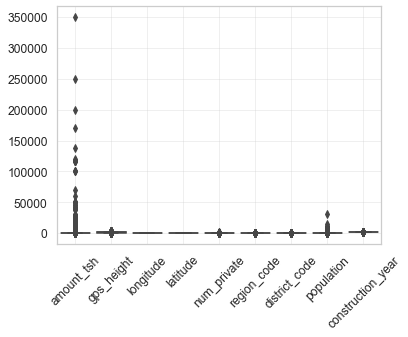

In [38]:
#check for outliers
sns.boxplot(train_df1)
plt.tight_layout()
plt.grid(alpha=.3)
plt.xticks(rotation=45)
;

### 3.1.1.1 Feature Engineering of Train Data Set

In [39]:
#create a new column for the year of record
train_df1["recorded_year"] = train_df1["date_recorded"].dt.year

#create a new column for age of the wells at the time of recording
train_df1["age_years"] = train_df1["recorded_year"] - train_df1["construction_year"]

#check the head 
train_df1.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,...,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group,recorded_year,age_years
0,6000.0,2011-03-14,roman,1390.0,roman,34.938093,-9.856322,0,lake nyasa,iringa,...,gravity,user-group,annually,good,enough,groundwater,communal standpipe,functional,2011,12.0
1,0.0,2013-03-06,grumeti,1399.0,grumeti,34.698766,-2.147466,0,lake victoria,mara,...,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,functional,2013,3.0
2,25.0,2013-02-25,lottery club,686.0,world vision,37.460664,-3.821329,0,pangani,manyara,...,gravity,user-group,per bucket,good,enough,surface,communal standpipe,functional,2013,4.0
3,0.0,2013-01-28,unicef,263.0,unicef,38.486161,-11.155298,0,ruvuma / southern coast,mtwara,...,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,non functional,2013,27.0
4,0.0,2011-07-13,action in a,1190.0,artisan,31.130847,-1.825359,0,lake victoria,kagera,...,gravity,other,never pay,good,seasonal,surface,communal standpipe,functional,2011,11.0


In [40]:
# create bins for the age years(categorical)
train_df1["age_bin"] = pd.cut(
        train_df1["age_years"],
        bins=[-1, 5, 15, 30, 80],
        labels=["0-5", "6-15", "16-30","30+"]
    ).astype("category")

# check the first 5 rows
train_df1.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,...,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group,recorded_year,age_years,age_bin
0,6000.0,2011-03-14,roman,1390.0,roman,34.938093,-9.856322,0,lake nyasa,iringa,...,user-group,annually,good,enough,groundwater,communal standpipe,functional,2011,12.0,6-15
1,0.0,2013-03-06,grumeti,1399.0,grumeti,34.698766,-2.147466,0,lake victoria,mara,...,user-group,never pay,good,insufficient,surface,communal standpipe,functional,2013,3.0,0-5
2,25.0,2013-02-25,lottery club,686.0,world vision,37.460664,-3.821329,0,pangani,manyara,...,user-group,per bucket,good,enough,surface,communal standpipe,functional,2013,4.0,0-5
3,0.0,2013-01-28,unicef,263.0,unicef,38.486161,-11.155298,0,ruvuma / southern coast,mtwara,...,user-group,never pay,good,dry,groundwater,communal standpipe,non functional,2013,27.0,16-30
4,0.0,2011-07-13,action in a,1190.0,artisan,31.130847,-1.825359,0,lake victoria,kagera,...,other,never pay,good,seasonal,surface,communal standpipe,functional,2011,11.0,6-15


In [41]:
# Create elevation bins
train_df1["elevation_bin"] = pd.cut(
    train_df1["gps_height"],
    bins=[-100, 500, 1000, 1500, 2500, 6000],
    labels=["lowland (<500m)", "lower midland (500-1000m)", "upper midland (1000-1500m)", 
            "highland (1500-2500m)", "extreme highland (>2500m)"]
).astype("category")

# check the first 5 rows
train_df1.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,...,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group,recorded_year,age_years,age_bin,elevation_bin
0,6000.0,2011-03-14,roman,1390.0,roman,34.938093,-9.856322,0,lake nyasa,iringa,...,annually,good,enough,groundwater,communal standpipe,functional,2011,12.0,6-15,upper midland (1000-1500m)
1,0.0,2013-03-06,grumeti,1399.0,grumeti,34.698766,-2.147466,0,lake victoria,mara,...,never pay,good,insufficient,surface,communal standpipe,functional,2013,3.0,0-5,upper midland (1000-1500m)
2,25.0,2013-02-25,lottery club,686.0,world vision,37.460664,-3.821329,0,pangani,manyara,...,per bucket,good,enough,surface,communal standpipe,functional,2013,4.0,0-5,lower midland (500-1000m)
3,0.0,2013-01-28,unicef,263.0,unicef,38.486161,-11.155298,0,ruvuma / southern coast,mtwara,...,never pay,good,dry,groundwater,communal standpipe,non functional,2013,27.0,16-30,lowland (<500m)
4,0.0,2011-07-13,action in a,1190.0,artisan,31.130847,-1.825359,0,lake victoria,kagera,...,never pay,good,seasonal,surface,communal standpipe,functional,2011,11.0,6-15,upper midland (1000-1500m)


In [42]:
#create a function for bucketing

def top_n_bucket(series, n=20, other = "other"):
    top = series.value_counts().nlargest(n).index
    return series.where(series.isin(top), other)

# apply function to the funder column and create a new column
train_df1["funder_bkt"] = top_n_bucket(train_df1["funder"],n=20)

#apply function to the installer column and create a new column
train_df1["installer_bkt"] = top_n_bucket(train_df1["installer"], n=20)

#check the unique value counts

train_df1["funder_bkt"].value_counts()

other                     26448
government of tanzania     9084
unknown                    4418
danida                     3114
hesawa                     2202
rwssp                      1374
world bank                 1349
kkkt                       1287
world vision               1247
unicef                     1057
tasaf                       877
district council            843
dhv                         829
private individual          826
dwsp                        811
norad                       765
german republic             610
tcrs                        602
ministry of water           590
water                       583
dwe                         484
Name: funder_bkt, dtype: int64

In [43]:
#check the unique value counts

train_df1["installer_bkt"].value_counts()

other               22162
dwe                 17418
unknown              4439
government           2654
danida               1674
hesawa               1395
rwe                  1206
commu                1065
district council      965
kkkt                  910
tcrs                  707
world vision          699
ces                   610
community             555
gover                 511
amref                 443
lga                   413
tasaf                 411
wedeco                398
fini water            389
dmdd                  376
Name: installer_bkt, dtype: int64

In [44]:
# Mapping regions → zones
region_zone_map = {
    "dar es salaam": "coastal",
    "pwani": "coastal",
    "tanga": "coastal",
    "lindi": "coastal",
    "mtwara": "coastal",

    "mwanza": "lake_basin",
    "kagera": "lake_basin",
    "mara": "lake_basin",
    "shinyanga": "lake_basin",
    "tabora": "lake_basin",

    "arusha": "northern_highlands",
    "kilimanjaro": "northern_highlands",
    "manyara": "northern_highlands",

    "iringa": "southern_highlands",
    "mbeya": "southern_highlands",
    "ruvuma": "southern_highlands",
    "rukwa": "southern_highlands",
    "njombe": "southern_highlands",
    
    "dodoma": "central",
    "singida": "central"
}

# Create new column
train_df1["region_zone"] = train_df1["region"].map(region_zone_map).fillna("other")

# Quick check
print(train_df1["region_zone"].value_counts())


lake_basin            15328
southern_highlands    14381
northern_highlands     9312
coastal                9263
other                  6822
central                4294
Name: region_zone, dtype: int64


In [45]:
#Wells per region
train_df1["wells_per_region"] = train_df1.groupby("region")["status_group"].transform("count")

train_df1["people_per_well_region"] = train_df1["population"] / train_df1["wells_per_region"]

# Quick check
train_df1.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,...,status_group,recorded_year,age_years,age_bin,elevation_bin,funder_bkt,installer_bkt,region_zone,wells_per_region,people_per_well_region
0,6000.0,2011-03-14,roman,1390.0,roman,34.938093,-9.856322,0,lake nyasa,iringa,...,functional,2011,12.0,6-15,upper midland (1000-1500m),other,other,southern_highlands,5294,0.020589
1,0.0,2013-03-06,grumeti,1399.0,grumeti,34.698766,-2.147466,0,lake victoria,mara,...,functional,2013,3.0,0-5,upper midland (1000-1500m),other,other,lake_basin,1969,0.142204
2,25.0,2013-02-25,lottery club,686.0,world vision,37.460664,-3.821329,0,pangani,manyara,...,functional,2013,4.0,0-5,lower midland (500-1000m),other,world vision,northern_highlands,1583,0.157928
3,0.0,2013-01-28,unicef,263.0,unicef,38.486161,-11.155298,0,ruvuma / southern coast,mtwara,...,non functional,2013,27.0,16-30,lowland (<500m),unicef,other,coastal,1730,0.033526
4,0.0,2011-07-13,action in a,1190.0,artisan,31.130847,-1.825359,0,lake victoria,kagera,...,functional,2011,11.0,6-15,upper midland (1000-1500m),other,other,lake_basin,3316,0.000000


In [46]:
# Save cleaned train dataset
train_df1.to_csv("data/train_clean.csv", index=False)

print("✅ Cleaned datasets saved successfully!")

✅ Cleaned datasets saved successfully!


### 3.1.2 Data Cleaning of Test Data

In [47]:
# create a copy of the original test df

test_df1 = test_df.copy(deep=True)

test_df1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [48]:
# check the columns
test_df1.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [49]:
# convert date recorded to date time
test_df1['date_recorded'] = pd.to_datetime(test_df1['date_recorded'])

test_df1.dtypes

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
subvillage                       object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
public_meeting                   object
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                           object
construction_year                 int64
extraction_type                  object


In [50]:
# Convert construction_year = 0 to NaN (not realistic)
test_df1['construction_year'] = test_df1['construction_year'].replace(0, np.nan)

In [51]:
# cleaning latitude(ranges between -12 and 0) and longitude(ranges between 29 and 41) for Tanzania

# Replace 0.0 values with NaN
test_df1['latitude'] = test_df1['latitude'].replace(0, np.nan)
test_df1['longitude'] = test_df1['longitude'].replace(0, np.nan)

# Drop values outside Tanzania bounds 
test_df1.loc[(train_df1['latitude'] > 0) | (test_df1['latitude'] < -12), 'latitude'] = np.nan
test_df1.loc[(train_df1['longitude'] < 29) | (test_df1['longitude'] > 41), 'longitude'] = np.nan

# Check
test_df1[['latitude', 'longitude']].describe()

,latitude,longitude
count,1.485000e+04,14393.000000
mean,-5.684724e+00,35.143114
std,2.940803e+00,2.614986
min,-1.156459e+01,29.612776
25%,-8.443970e+00,33.242062
50%,-5.049750e+00,35.011381
75%,-3.320594e+00,37.258894
max,-2.000000e-08,40.325016


In [52]:
#check summary statistics again
test_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,14850.0,37161.972929,21359.364833,10.000000,18727.000000,37361.500000,55799.750000,7.424900e+04
amount_tsh,14850.0,322.826983,2510.968644,0.000000,0.000000,0.000000,25.000000,2.000000e+05
gps_height,14850.0,655.147609,691.261185,-57.000000,0.000000,344.000000,1308.000000,2.777000e+03
longitude,14393.0,35.143114,2.614986,29.612776,33.242062,35.011381,37.258894,4.032502e+01
latitude,14850.0,-5.684724,2.940803,-11.564592,-8.443970,-5.049750,-3.320594,-2.000000e-08
num_private,14850.0,0.415084,8.167910,0.000000,0.000000,0.000000,0.000000,6.690000e+02
region_code,14850.0,15.139057,17.191329,1.000000,5.000000,12.000000,17.000000,9.900000e+01
district_code,14850.0,5.626397,9.673842,0.000000,2.000000,3.000000,5.000000,8.000000e+01
population,14850.0,184.114209,469.499332,0.000000,0.000000,20.000000,220.000000,1.146900e+04
construction_year,9590.0,1997.097914,12.310565,1960.000000,1988.000000,2000.000000,2008.000000,2.013000e+03


In [53]:
# cleaning gps height as an elevation of 0 means that the well is at the sea level

# Only set to NaN if the well is inland (not coastal regions)
test_df1.loc[(test_df1["gps_height"] == 0) & (~test_df1["region"].isin(coastal_regions)), "gps_height"] = np.nan


if test_df1["gps_height"].isna().any():
    test_df1["gps_height"] = test_df1.groupby("region")["gps_height"].transform(
            lambda x: x.fillna(x.median()))

# fill remaining null values with median
test_df1["gps_height"] = test_df1["gps_height"].fillna(test_df1["gps_height"].median())

#check for null values
test_df1["gps_height"].isna().sum()

0

In [54]:
# check for unique values
for col in test_df1.select_dtypes(include='object').columns:
    print(f"\n--- {col.upper()} ---")
    print(test_df1[col].value_counts(dropna=False).head(20))  # show top 20
    print("Unique values:", test_df1[col].nunique())


--- FUNDER ---
Government Of Tanzania    2215
NaN                        869
Danida                     793
Hesawa                     580
World Bank                 352
Kkkt                       336
Rwssp                      329
World Vision               316
Unicef                     267
Tasaf                      259
Dhv                        236
Private Individual         208
0                          203
Dwsp                       201
District Council           194
Norad                      184
Water                      156
Germany Republi            155
Ministry Of Water          138
Tcrs                       133
Name: funder, dtype: int64
Unique values: 980

--- INSTALLER ---
DWE                   4349
NaN                    877
Government             457
RWE                    292
Commu                  287
DANIDA                 255
Hesawa                 230
KKKT                   222
0                      203
TCRS                   180
CES                    155
Ce

In [55]:
# clean the categorical columns using the clean_text function
cat_cols = test_df1.select_dtypes(include="O")

for col in cat_cols:
    if col in test_df1.columns:
        test_df1[col] = test_df1[col].apply(clean_text)

test_df1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,dmdd,1996.0,dmdd,35.290799,-4.059696,dinamu secondary school,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,government of tanzania,1569.0,dwe,36.656709,-3.309214,kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567.0,NaN,34.767863,-5.004344,puma secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,finn water,267.0,finn water,38.058046,-9.418672,kwa mzee pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,bruder,1260.0,bruder,35.006123,-10.950412,kwa mzee turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [56]:
# check for missing values
test_df1.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                   1073
gps_height                  0
installer                1080
longitude                 457
latitude                    0
wpt_name                  877
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7251
permit                    737
construction_year        5260
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [57]:
# check for unique values
for col in test_df1.select_dtypes(include='object').columns:
    print(f"\n--- {col.upper()} ---")
    print(test_df1[col].value_counts(dropna=False).head(20))  # show top 20
    print("Unique values:", test_df1[col].nunique())


--- FUNDER ---
government of tanzania    2215
NaN                       1073
danida                     793
hesawa                     580
world bank                 352
kkkt                       336
rwssp                      329
world vision               316
unicef                     267
tasaf                      259
dhv                        236
private individual         208
dwsp                       201
district council           194
norad                      184
water                      156
germany republi            155
ministry of water          138
tcrs                       133
hifab                      127
Name: funder, dtype: int64
Unique values: 978

--- INSTALLER ---
dwe                   4358
NaN                   1080
government             476
hesawa                 373
rwe                    292
commu                  289
danida                 256
kkkt                   225
district council       221
tcrs                   180
central government     170
wo

In [58]:
test_df1 = test_df1.drop(columns=col_to_drop, errors="coerce")

test_df1.shape

(14850, 25)

In [59]:
#map the funder dictionary to the funders
test_df1["funder"] = test_df1["funder"].replace(funder_map)

test_df1["funder"].value_counts()

government of tanzania    2215
danida                     793
hesawa                     580
world bank                 352
kkkt                       336
                          ... 
oxfarm gb                    1
mount meru flowers           1
idara ya afya                1
italy                        1
livin                        1
Name: funder, Length: 978, dtype: int64

In [60]:
# use installer map to standardise the installers
test_df1["installer"] = test_df1["installer"].replace(installer_map)

test_df1["installer"].value_counts()

dwe                 4358
government           646
danida               418
hesawa               373
rwe                  292
                    ... 
buguba                 1
twesa/ community       1
fida                   1
tgts                   1
livi                   1
Name: installer, Length: 960, dtype: int64

In [61]:
# check for missing values again
test_df1.isna().sum()

amount_tsh                  0
date_recorded               0
funder                   1073
gps_height                  0
installer                1080
longitude                 457
latitude                    0
num_private                 0
basin                       0
region                      0
region_code                 0
district_code               0
lga                         0
population                  0
public_meeting            821
scheme_management         969
permit                    737
construction_year        5260
extraction_type_class       0
management_group            0
payment_type                0
quality_group               0
quantity_group              0
source_class                0
waterpoint_type_group       0
dtype: int64

In [62]:
# fill missing values for categorical columns with "unknown"

for col in ["funder", "installer", "scheme_management"]:
    test_df1[col] = test_df1[col].fillna("unknown")
    
#check for missing values
test_df1.isna().sum()

amount_tsh                  0
date_recorded               0
funder                      0
gps_height                  0
installer                   0
longitude                 457
latitude                    0
num_private                 0
basin                       0
region                      0
region_code                 0
district_code               0
lga                         0
population                  0
public_meeting            821
scheme_management           0
permit                    737
construction_year        5260
extraction_type_class       0
management_group            0
payment_type                0
quality_group               0
quantity_group              0
source_class                0
waterpoint_type_group       0
dtype: int64

In [63]:
#impute null values for longitude with the regional median longitude
if test_df1["longitude"].isna().any():
    test_df1["longitude"] = test_df1.groupby("region")["longitude"].transform(lambda x: x.fillna(x.median()))

#check null values
test_df1["longitude"].isna().sum()

0

In [64]:
# impute null values for construction year with the regional median construction year
if test_df1["construction_year"].isna().any():
    test_df1["construction_year"] = test_df1.groupby("region")["construction_year"].transform(
            lambda s: s.fillna(s.median()))

# impute remaining nulls with the median construction year
test_df1["construction_year"] = test_df1["construction_year"].fillna(train_df1["construction_year"].median())

#check for null values
test_df1["construction_year"].isna().sum()

0

In [65]:
# apply the function fill mode to impute the permit by region
test_df1["permit"] = test_df1.groupby("region")["permit"].transform(fill_mode)

# check for null values
test_df1["permit"].isna().sum()

0

In [66]:
# apply the function to imputing the public meeting by region
test_df1["public_meeting"] = test_df1.groupby("region")["public_meeting"].transform(fill_mode)

# check for null values
test_df1["public_meeting"].isna().sum()

0

In [67]:
# check for missing values
test_df1.isna().sum()

amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type_class    0
management_group         0
payment_type             0
quality_group            0
quantity_group           0
source_class             0
waterpoint_type_group    0
dtype: int64

In [68]:
# check for duplicates
test_df1.duplicated().sum()

87

In [69]:
# drop duplicates
test_df1.drop_duplicates(inplace=True)

# check for duplicates
test_df1.duplicated().sum()

0

''

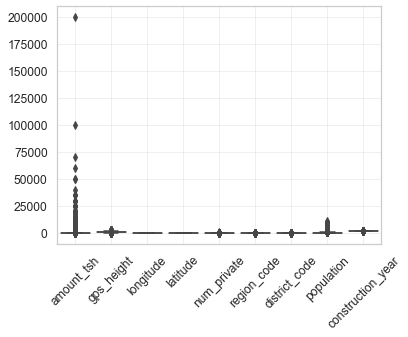

In [70]:
#check for outliers
sns.boxplot(test_df1)
plt.tight_layout()
plt.grid(alpha=.3)
plt.xticks(rotation=45)
;

### 3.1.2.1 Feature Engineering of Test Data Test

In [71]:
#create a new column for the year of record
test_df1["recorded_year"] = test_df1["date_recorded"].dt.year

#create a new column for age of the wells at the time of recording
test_df1["age_years"] = test_df1["recorded_year"] - test_df1["construction_year"]

#check the head 
test_df1.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,...,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,recorded_year,age_years
0,0.0,2013-02-04,dmdd,1996.0,dmdd,35.290799,-4.059696,0,internal,manyara,...,2012.0,other,parastatal,never pay,good,seasonal,surface,other,2013,1.0
1,0.0,2013-02-04,government of tanzania,1569.0,dwe,36.656709,-3.309214,0,pangani,arusha,...,2000.0,gravity,user-group,never pay,good,insufficient,groundwater,communal standpipe,2013,13.0
2,0.0,2013-02-01,unknown,1567.0,unknown,34.767863,-5.004344,0,internal,singida,...,2010.0,other,user-group,never pay,good,insufficient,surface,other,2013,3.0
3,0.0,2013-01-22,finn water,267.0,finn water,38.058046,-9.418672,0,ruvuma / southern coast,lindi,...,1987.0,other,user-group,unknown,good,dry,groundwater,other,2013,26.0
4,500.0,2013-03-27,bruder,1260.0,bruder,35.006123,-10.950412,0,ruvuma / southern coast,ruvuma,...,2000.0,gravity,user-group,monthly,good,enough,groundwater,communal standpipe,2013,13.0


In [72]:
# create bins for the age years(categorical)
test_df1["age_bin"] = pd.cut(
        train_df1["age_years"],
        bins=[-1, 5, 15, 30, 80],
        labels=["0-5", "6-15", "16-30","30+"]
    ).astype("category")

# check the first 5 rows
test_df1.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,...,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,recorded_year,age_years,age_bin
0,0.0,2013-02-04,dmdd,1996.0,dmdd,35.290799,-4.059696,0,internal,manyara,...,other,parastatal,never pay,good,seasonal,surface,other,2013,1.0,6-15
1,0.0,2013-02-04,government of tanzania,1569.0,dwe,36.656709,-3.309214,0,pangani,arusha,...,gravity,user-group,never pay,good,insufficient,groundwater,communal standpipe,2013,13.0,0-5
2,0.0,2013-02-01,unknown,1567.0,unknown,34.767863,-5.004344,0,internal,singida,...,other,user-group,never pay,good,insufficient,surface,other,2013,3.0,0-5
3,0.0,2013-01-22,finn water,267.0,finn water,38.058046,-9.418672,0,ruvuma / southern coast,lindi,...,other,user-group,unknown,good,dry,groundwater,other,2013,26.0,16-30
4,500.0,2013-03-27,bruder,1260.0,bruder,35.006123,-10.950412,0,ruvuma / southern coast,ruvuma,...,gravity,user-group,monthly,good,enough,groundwater,communal standpipe,2013,13.0,6-15


In [73]:
# Create elevation bins
test_df1["elevation_bin"] = pd.cut(
    test_df1["gps_height"],
    bins=[-100, 500, 1000, 1500, 2500, 6000],
    labels=["lowland (<500m)", "lower midland (500-1000m)", "upper midland (1000-1500m)", 
            "highland (1500-2500m)", "extreme highland (>2500m)"]
).astype("category")

# check the first 5 rows
test_df1.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,...,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,recorded_year,age_years,age_bin,elevation_bin
0,0.0,2013-02-04,dmdd,1996.0,dmdd,35.290799,-4.059696,0,internal,manyara,...,parastatal,never pay,good,seasonal,surface,other,2013,1.0,6-15,highland (1500-2500m)
1,0.0,2013-02-04,government of tanzania,1569.0,dwe,36.656709,-3.309214,0,pangani,arusha,...,user-group,never pay,good,insufficient,groundwater,communal standpipe,2013,13.0,0-5,highland (1500-2500m)
2,0.0,2013-02-01,unknown,1567.0,unknown,34.767863,-5.004344,0,internal,singida,...,user-group,never pay,good,insufficient,surface,other,2013,3.0,0-5,highland (1500-2500m)
3,0.0,2013-01-22,finn water,267.0,finn water,38.058046,-9.418672,0,ruvuma / southern coast,lindi,...,user-group,unknown,good,dry,groundwater,other,2013,26.0,16-30,lowland (<500m)
4,500.0,2013-03-27,bruder,1260.0,bruder,35.006123,-10.950412,0,ruvuma / southern coast,ruvuma,...,user-group,monthly,good,enough,groundwater,communal standpipe,2013,13.0,6-15,upper midland (1000-1500m)


In [74]:
# apply function to the funder column and create a new column
test_df1["funder_bkt"] = top_n_bucket(test_df1["funder"],n=20)

#apply function to the installer column and create a new column
test_df1["installer_bkt"] = top_n_bucket(test_df1["installer"], n=20)

#check the unique value counts

test_df1["funder_bkt"].value_counts()

other                     6575
government of tanzania    2203
unknown                   1073
danida                     793
hesawa                     565
world bank                 352
kkkt                       336
rwssp                      317
world vision               316
unicef                     267
tasaf                      259
dhv                        236
private individual         208
district council           194
norad                      184
dwsp                       176
water                      156
german republic            155
ministry of water          138
tcrs                       133
hifab                      127
Name: funder_bkt, dtype: int64

In [75]:
#check the unique value counts

test_df1["installer_bkt"].value_counts()

other               5558
dwe                 4301
unknown             1080
government           640
danida               418
hesawa               372
rwe                  289
commu                289
kkkt                 225
district council     221
tcrs                 180
world vision         168
ces                  155
gover                142
community            135
tasaf                112
dmdd                 100
wedeco               100
amref                 95
lga                   93
norad                 90
Name: installer_bkt, dtype: int64

In [76]:
# Mapping regions → zones
# Create new column using region zone map
test_df1["region_zone"] = test_df1["region"].map(region_zone_map).fillna("other")

# Quick check
print(test_df1["region_zone"].value_counts())


lake_basin            3867
southern_highlands    3524
coastal               2337
northern_highlands    2265
other                 1749
central               1021
Name: region_zone, dtype: int64


In [77]:
# save cleaned test dataset

test_df1.to_csv("data/test_clean.csv", index = False)

print("✅ Cleaned datasets saved successfully!")

✅ Cleaned datasets saved successfully!


# 4. Exploratory Data Analysis(EDA)

Exploratory Data Analysis (EDA) is a critical step in understanding the Tanzania water wells dataset. The aim is not just to summarize the data, but to uncover patterns, trends, and relationships that can explain why some wells are functional while others fail.

Through this process, we will:

- Understand the distribution of our target variable (status_group).

- Explore geospatial, technical, operational, and demographic factors.

- Identify which features are most strongly associated with well reliability.

- Generate hypotheses that can guide modeling and business recommendations.

EDA will therefore bridge the gap between the business problem — unreliable rural water points — and the analytical solution, ensuring our model outputs are interpretable and actionable for stakeholders.

## 4.1 Univariate Analysis

### 4.1.1 Numerical Columns Univariate Analysis

In [78]:
# create a df of numerical columns
num_cols = train_df1.select_dtypes(include="number")

num_cols

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,recorded_year,age_years,wells_per_region,people_per_well_region
0,6000.0,1390.0,34.938093,-9.856322,0,11,5,109,1999.0,2011,12.0,5294,0.020589
1,0.0,1399.0,34.698766,-2.147466,0,20,2,280,2010.0,2013,3.0,1969,0.142204
2,25.0,686.0,37.460664,-3.821329,0,21,4,250,2009.0,2013,4.0,1583,0.157928
3,0.0,263.0,38.486161,-11.155298,0,90,63,58,1986.0,2013,27.0,1730,0.033526
4,0.0,1190.0,31.130847,-1.825359,0,18,1,0,2000.0,2011,11.0,3316,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210.0,37.169807,-3.253847,0,3,5,125,1999.0,2013,14.0,4379,0.028545
59396,4700.0,1212.0,35.249991,-9.070629,0,11,4,56,1996.0,2011,15.0,5294,0.010578
59397,0.0,1190.0,34.017087,-8.750434,0,12,7,0,2000.0,2011,11.0,4639,0.000000
59398,0.0,1190.0,35.861315,-6.378573,0,1,4,0,2000.0,2011,11.0,2201,0.000000


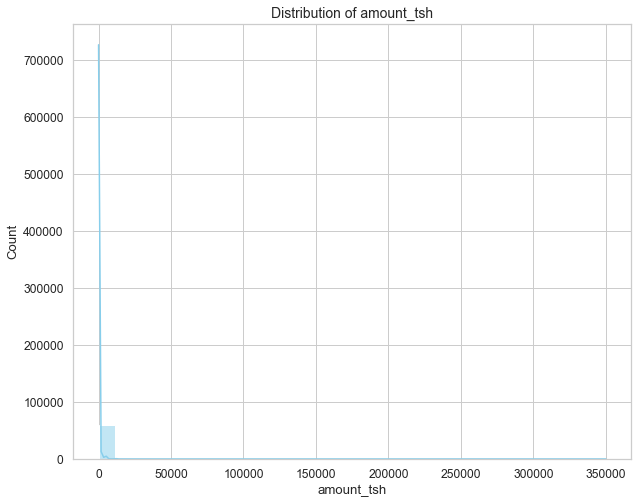

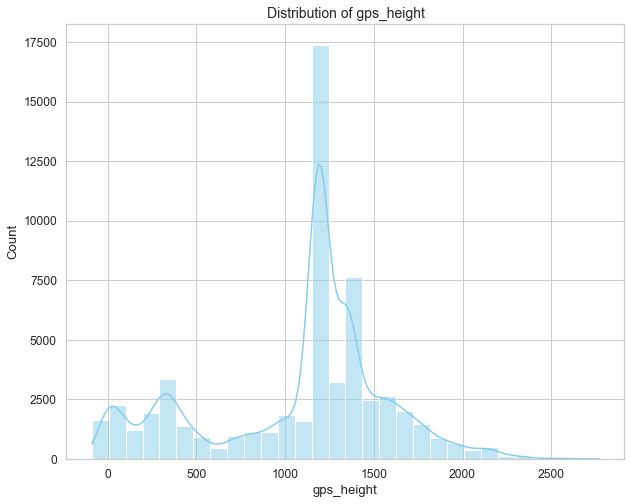

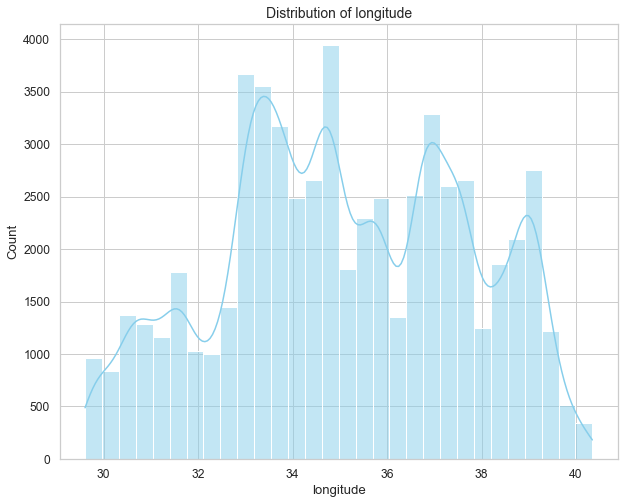

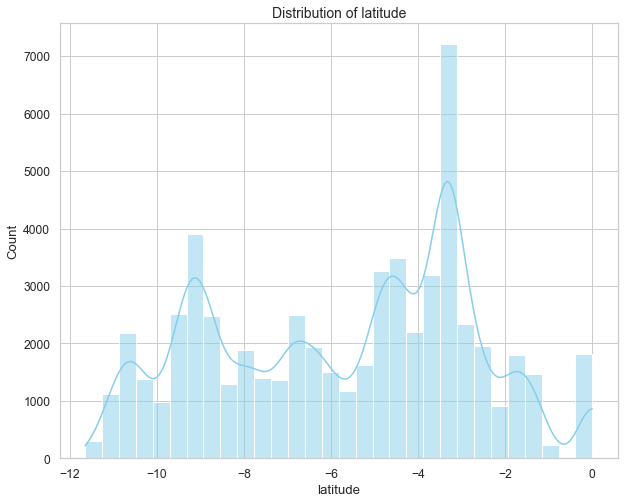

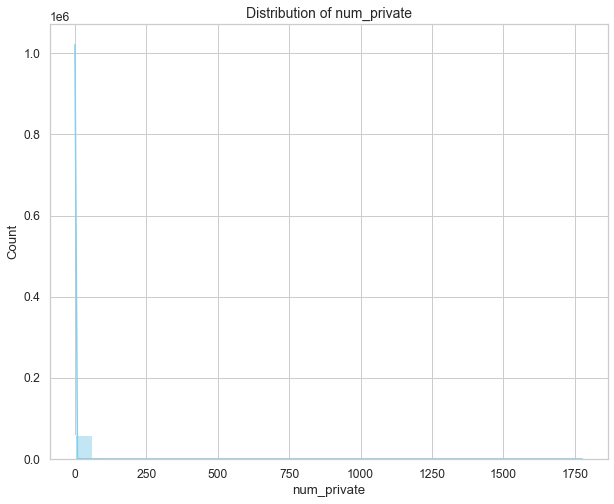

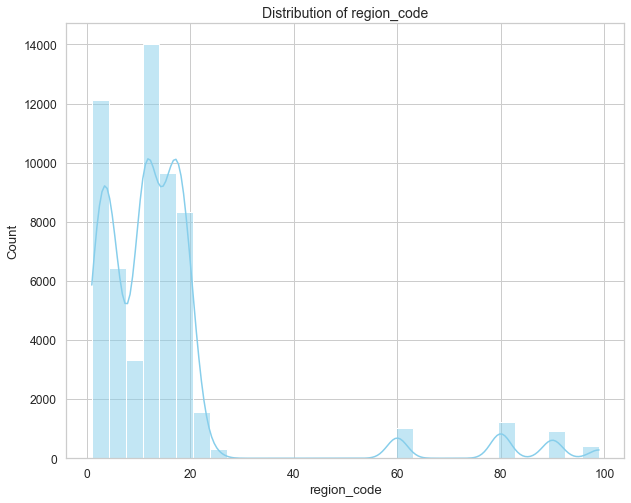

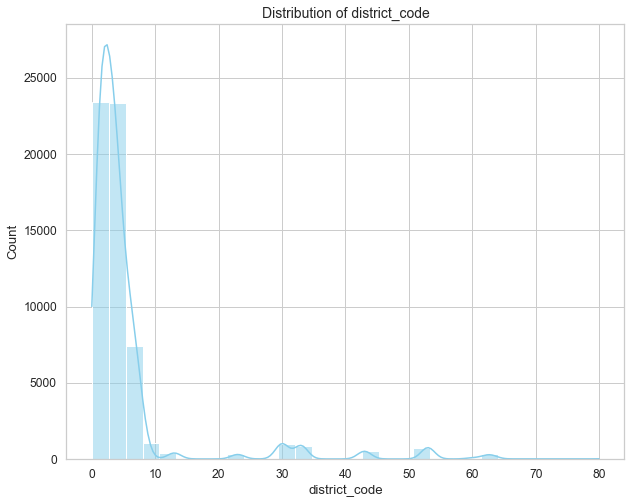

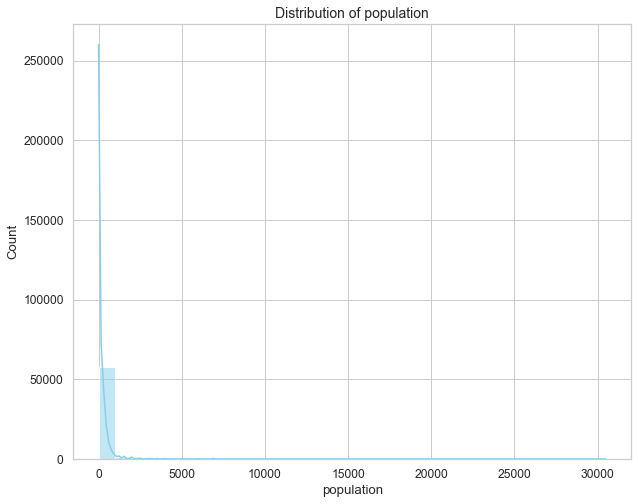

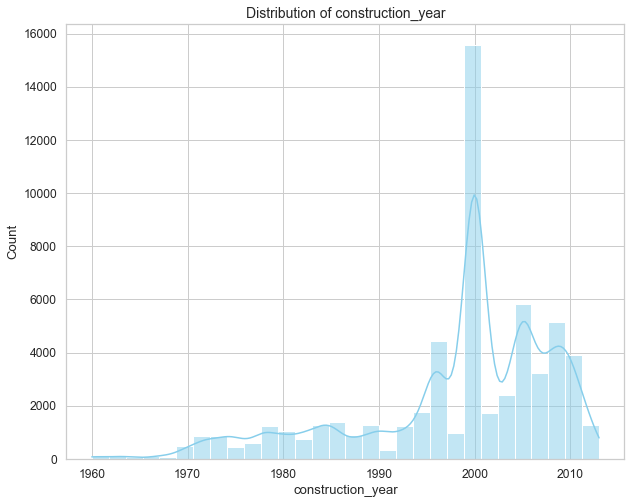

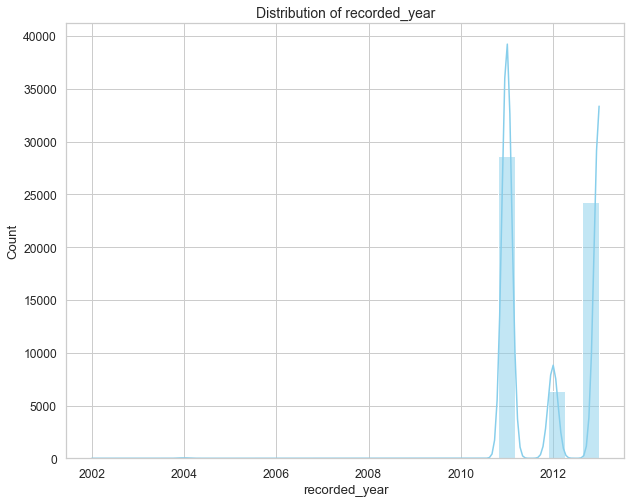

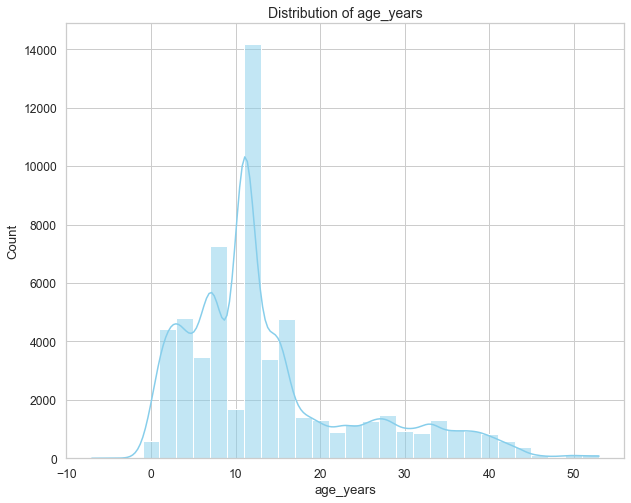

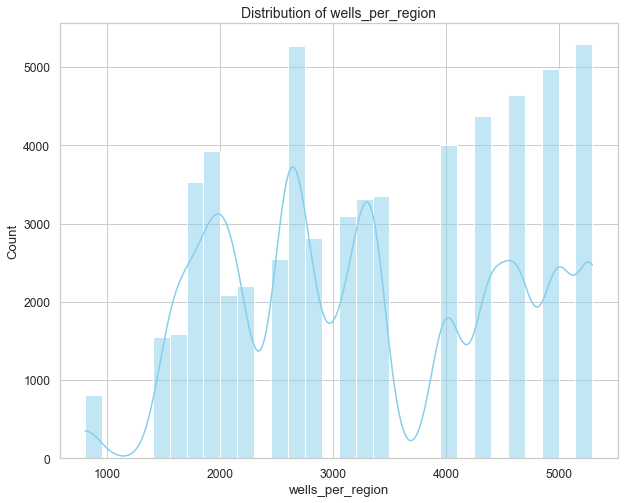

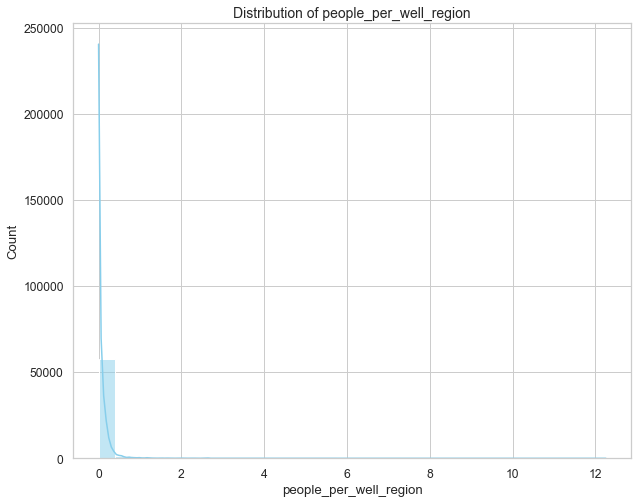

In [79]:
# visualise the numerical columns using a histogram

for col in num_cols:
    plt.figure(figsize=(10,8))
    sns.histplot(train_df1[col], kde=True, bins=30, color="skyblue")
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show();

### 4.1.2 Univariate Analysis of Categorical Columns

#### 4.1.2.1 Univariate Analysis of the Distribution of Well Functionality (Label/Target Variable)

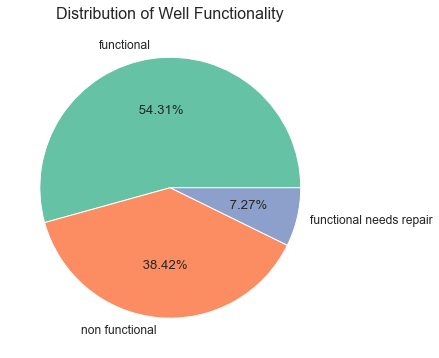

In [80]:
# plotting a pie chart of the functional status of 
label = ["functional", "non functional", "functional needs repair"]

plt.figure(figsize = (6,6))
plt.pie(train_df1["status_group"].value_counts(), labels=label, autopct=" %.2f%%")
plt.title("Distribution of Well Functionality", fontsize = 16)
plt.tight_layout
plt.show;

#### Interpretation

More than 45% of wells are not fully reliable (either broken or in need of repair).

This aligns with prior research that 30–40% of rural water wells in Sub-Saharan Africa are non-functional at any given time.

The “needs repair” group is relatively small but important: these wells are at risk of becoming non-functional if maintenance is not done quickly.

This imbalance shows that while the majority of wells work, there is still a significant water security challenge, justifying predictive modeling.

The predictive model must handle a class imbalance problem, since "functional needs repair" is a small but critical class (only ~7%).

#### 4.1.2.2 Univariate analysis of X features categorical columns

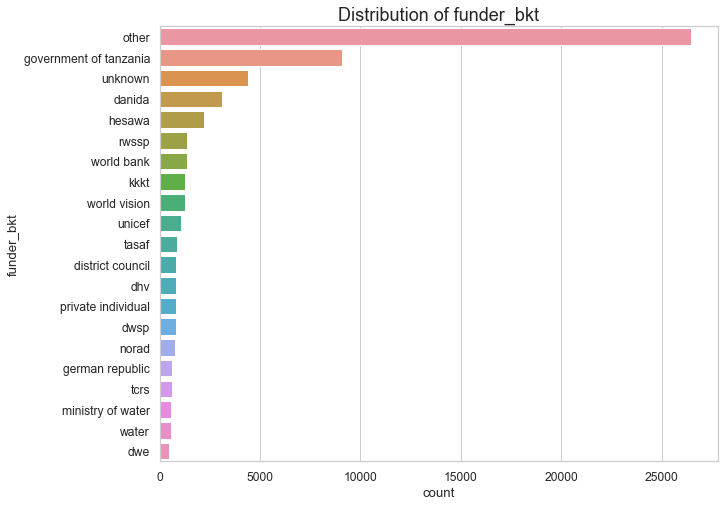

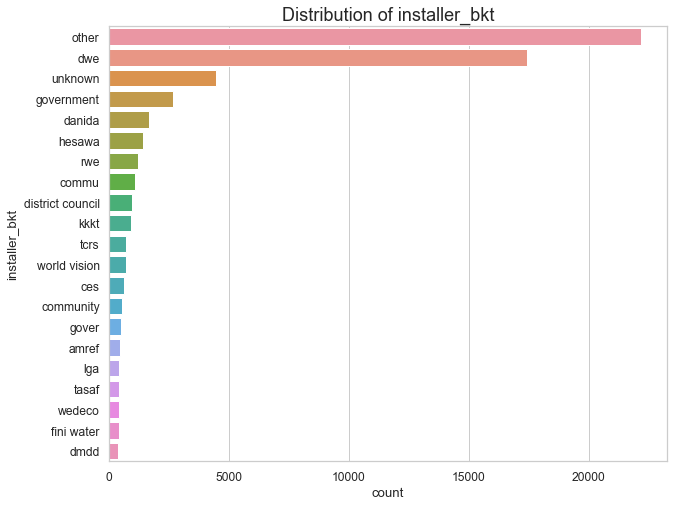

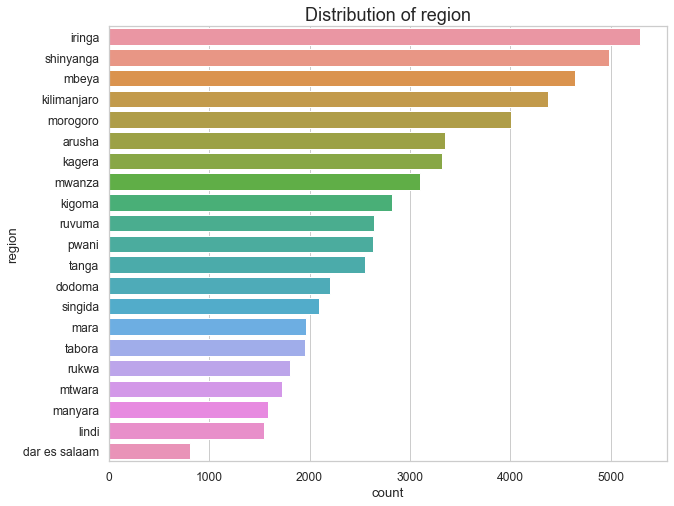

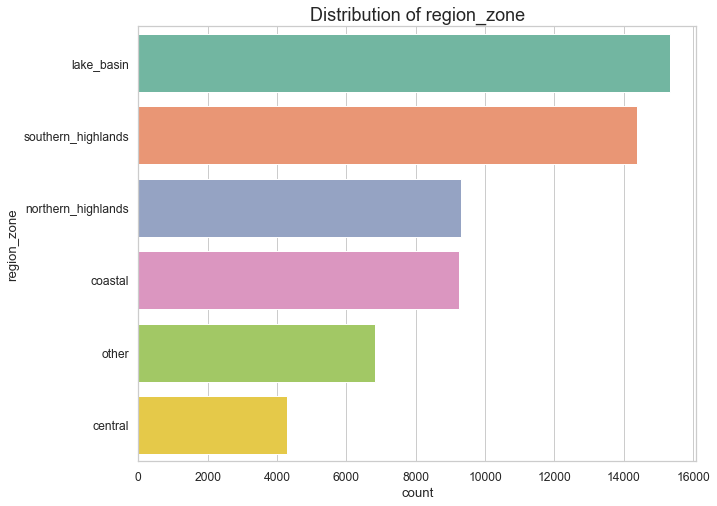

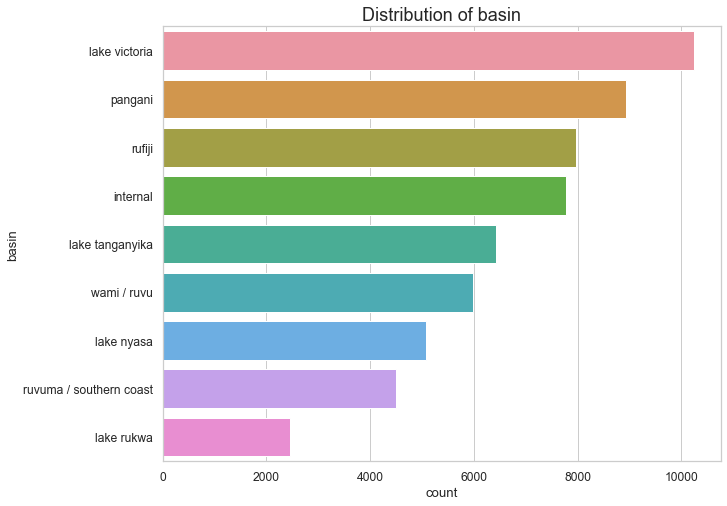

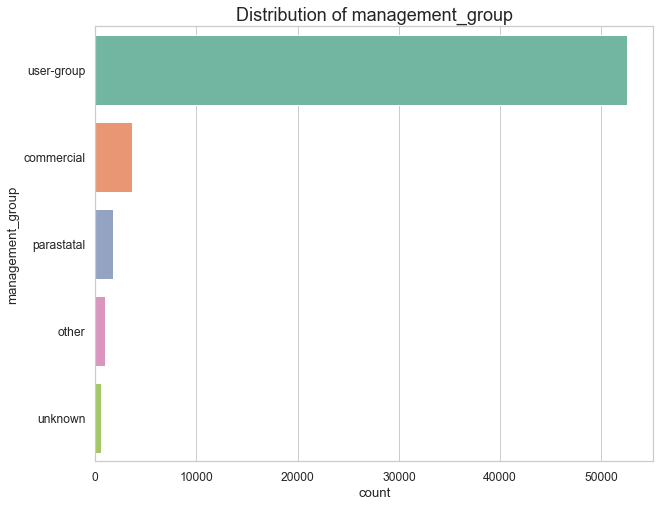

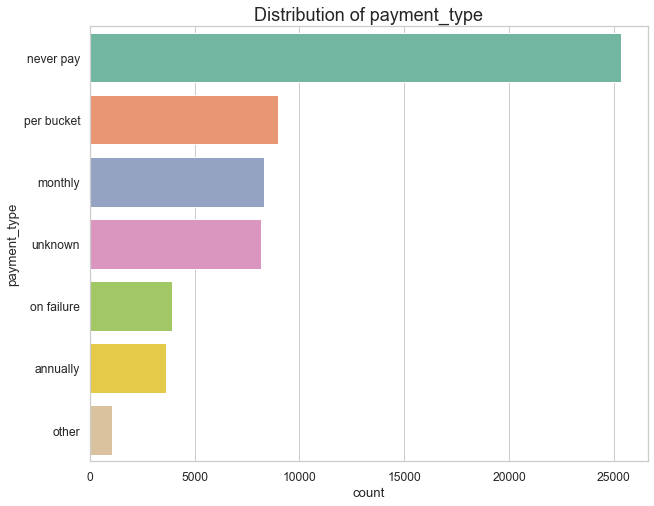

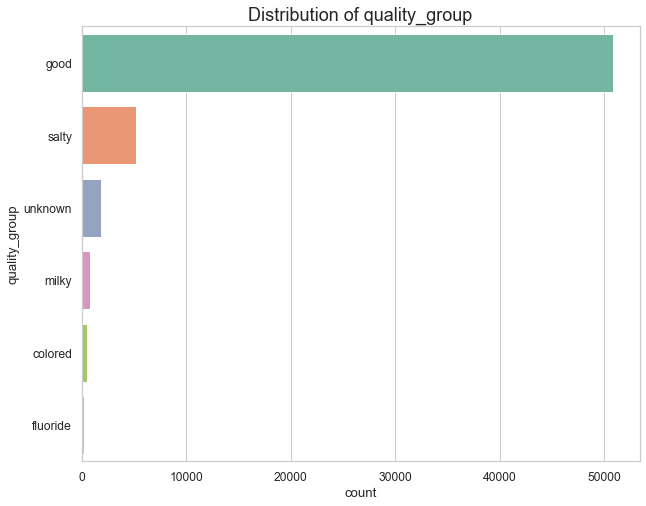

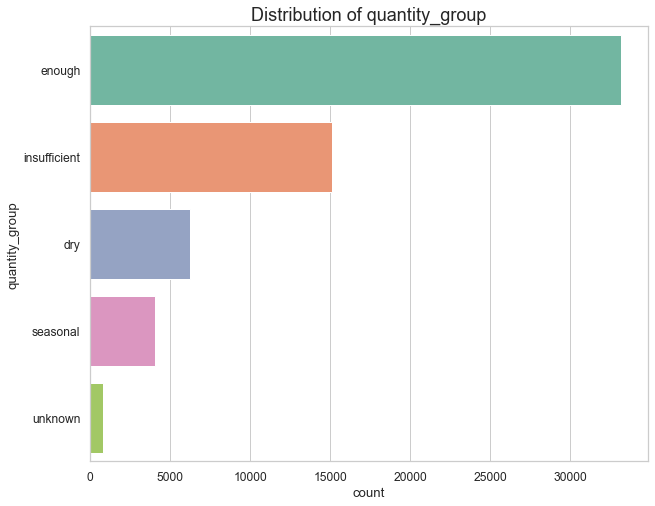

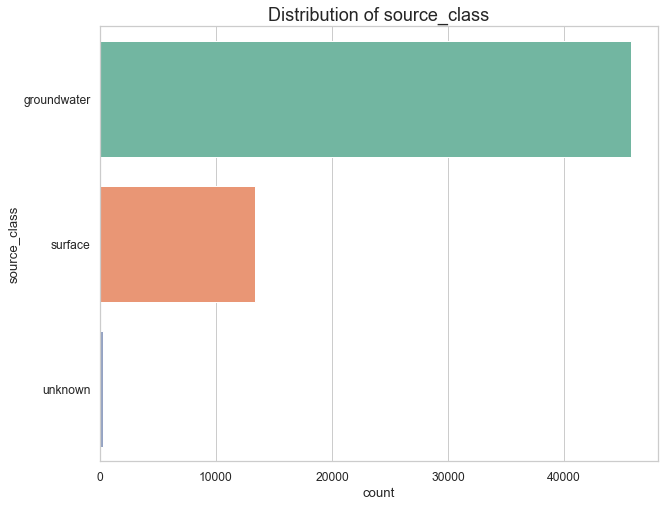

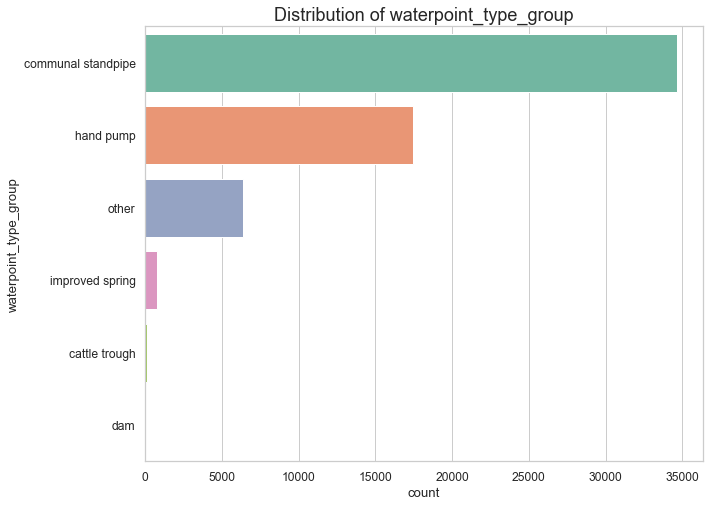

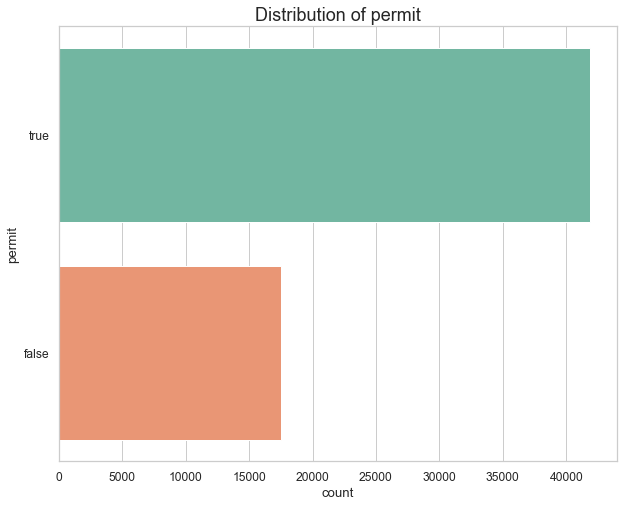

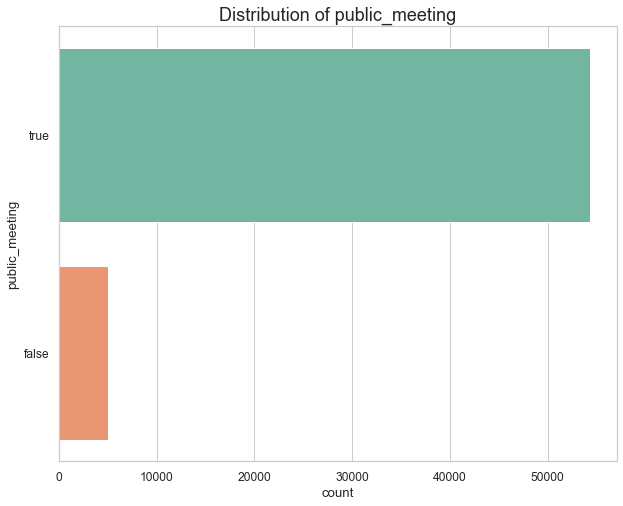

In [81]:
categorical_cols = [
    "funder_bkt", "installer_bkt", "region", "region_zone", "basin",
    "management_group", "payment_type", "quality_group", "quantity_group",
    "source_class", "waterpoint_type_group", "permit", "public_meeting"
]

for col in categorical_cols:
    plt.figure(figsize=(10,8))
    sns.countplot(data=train_df1, y=col, order=train_df1[col].value_counts().index)
    plt.title(f"Distribution of {col}", fontsize=18)
    plt.show();


#### Observation and Interpretation

1. Majority of the wells have a permit and there was a public meeting held indicating presence of good governance measures
2. Majority of the waterpoints are the communal standpipes, followed by hand pumps and others
3. Majority of the wells source of water is groundwater as opposed to surface water hence needing to ensure groundwater table is not exploited beyond replenishment.
4. Majority of the wells provide enough water as per the demand followed by a considerable quantity producing insufficient water to meet the demand. This may be strongly related to functionality.
5. Majority of the wells have good quality water. However, there are some with poor quality(salty,milky,colored,fluoride) which could be linked to failures.
6. Majority of the wells lack a payment system. Payment schemes could influence sustainability.
7. The vast majority of wells are managed by a user group which could be predictive.
8. Distribution of the wells in the regions/zones/water basins is fairly balanced with Lake Zones and Coastal Zones dominating.
9. Other funders and installers combined dominate in numbers indicating presence of smaller NGOs implementing and funding construction of wells as opposed to the top funders.

## 4.2 Bivariate Analysis

The aim is to check how different factors affect the reliability/functionality of the wells.

### 4.2.1 Infrastructure and Technical Features

#### 4.2.1.1 Relationship between the type of waterpoint and thefunctionality status of the well

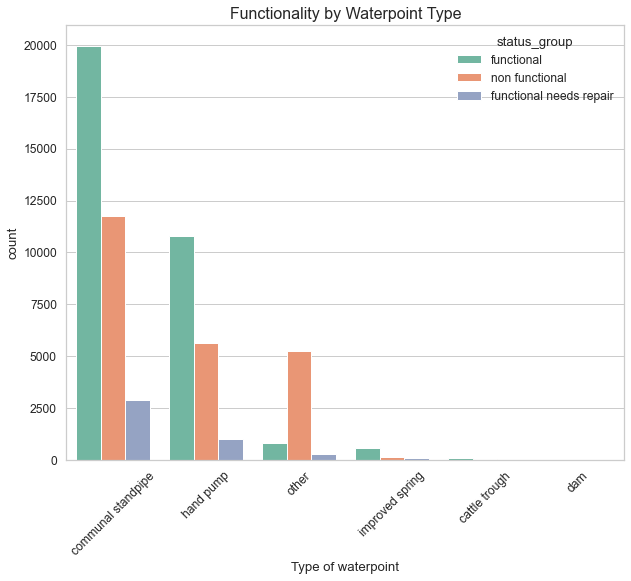

In [89]:
plt.figure(figsize=(10,8))
sns.countplot(data=train_df1, x="waterpoint_type_group", hue="status_group")
plt.xticks(rotation=45)
plt.title("Functionality by Waterpoint Type", fontsize=16)
plt.xlabel("Type of waterpoint")
plt.show()

**Observation**: Communal standpipes and hand pumps dominate. Both have large numbers of non-functional wells. Improved springs and dams are rare.

**Interpretation**: Since communal standpipes serve many people, their failures represent a big community risk. Preventive maintenance on these should be prioritized.

#### 4.2.1.2 Relationship between the type of extraction and the functionality status of the well

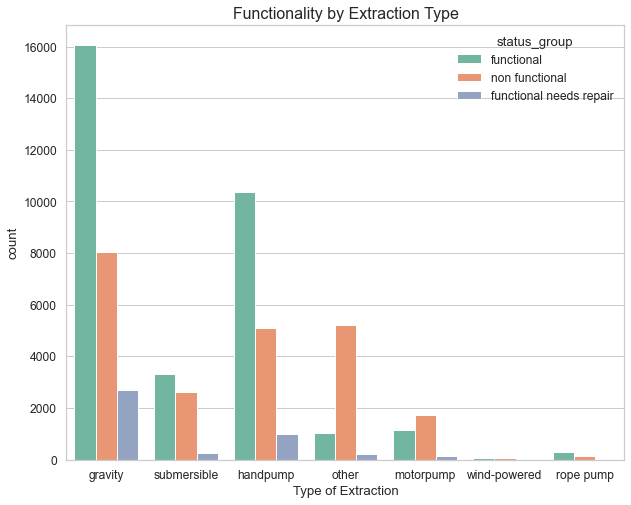

In [91]:
plt.figure(figsize=(10,8))
sns.countplot(data=train_df1, x="extraction_type_class", hue="status_group")
plt.title("Functionality by Extraction Type", fontsize=16)
plt.xlabel("Type of Extraction")
plt.show()

**Observation**: Gravity-fed systems are the most common and relatively reliable. Submersibles and handpumps also feature prominently. Motorpumps show a higher share of non-functional.

**Interpretation**: Technology choice matters. Motorpumps and “other” extraction types may have sustainability issues. NGOs and government should evaluate durability before funding new installations.

#### 4.2.1.3 Relationship between the age of the well and the functionality status of the well

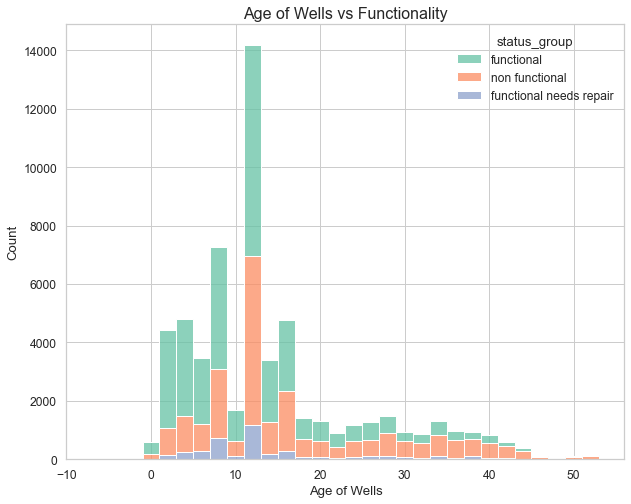

In [94]:
plt.figure(figsize=(10,8))
sns.histplot(data=train_df1, x="age_years", bins=30, hue="status_group", multiple="stack")
plt.title("Age of Wells vs Functionality", fontsize=16)
plt.xlabel("Age of Wells")
plt.show()

**Observation**: Wells under ~10 years dominate, but older wells show a higher share of non-functionality.

**Interpretation**: As expected, older wells degrade over time. Maintenance strategies should focus on wells aged 15+ years.

### 4.2.2 Governance and Management

#### 4.2.2.1 Relationship between Management Group of Wells and the Functionality Status of the Wells

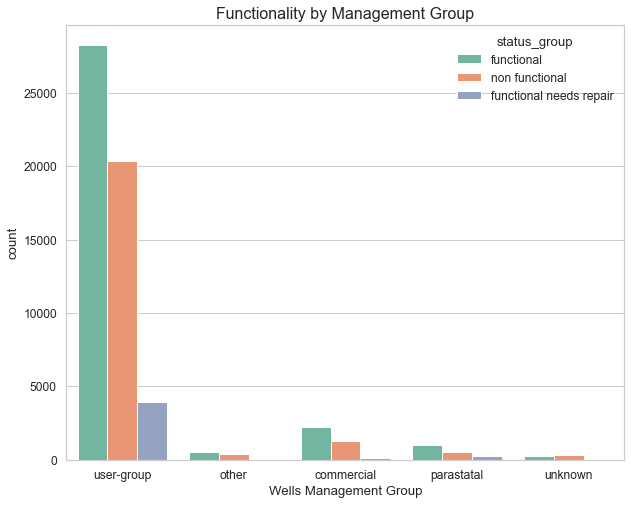

In [97]:
plt.figure(figsize=(10,8))
sns.countplot(data=train_df1, x="management_group", hue="status_group")
plt.title("Functionality by Management Group", fontsize=16)
plt.xlabel("Wells Management Group")
plt.show()

**Observation**: “User-group” dominates, but even within this category many wells are non-functional. Commercial, parastatal, and other management groups have smaller representation.

**Interpretation**: Community-based management is the norm but not always effective. This highlights the need for capacity building and governance support for user-groups.

#### 4.2.2.2 Relationship between Availability of Permits and Functionality Status of Wells

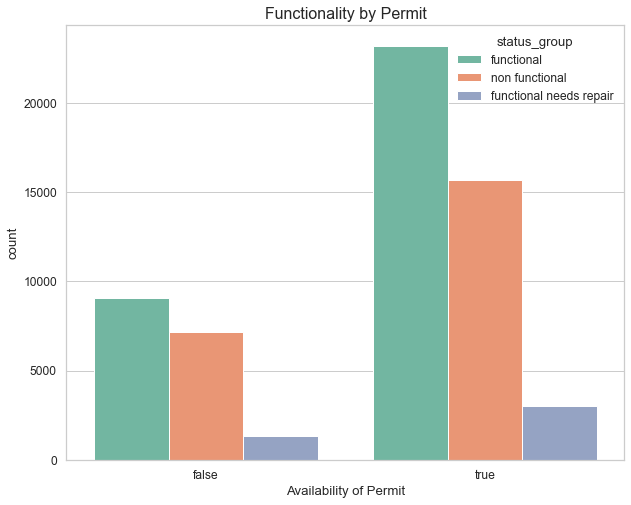

In [98]:
plt.figure(figsize=(10,8))
sns.countplot(data=train_df1, x="permit", hue="status_group")
plt.title("Functionality by Permit", fontsize=16)
plt.xlabel("Availability of Permit")
plt.show()

**Observation**: Wells with permits are more often functional, but many permitted wells are still non-functional.

**Interpretation**: Permits are helpful but not sufficient. They may reflect stronger oversight, but compliance/quality enforcement is uneven.

#### 4.2.2.3 Relationship between attendance of a public meeting at the waterpoint and the Functionality Status of Wells

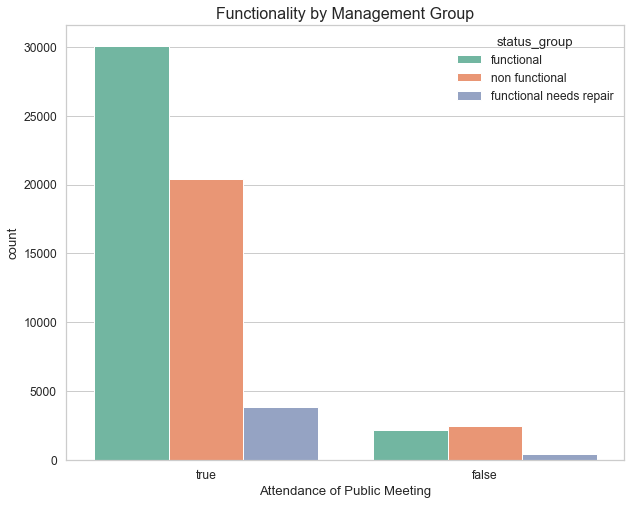

In [99]:
plt.figure(figsize=(10,8))
sns.countplot(data=train_df1, x="public_meeting", hue="status_group")
plt.title("Functionality by Management Group", fontsize=16)
plt.xlabel("Attendance of Public Meeting")
plt.show()

**Observation**: Wells in areas reporting public meetings are more functional, though still with substantial failures.

**Interpretation**: Community governance has a positive influence, but it doesn’t guarantee reliability. Public participation matters, but must be paired with funding and training.

### 4.2.3 Financial Features

#### 4.2.3.1 Top 10 Funders by Functionality Status of Wells

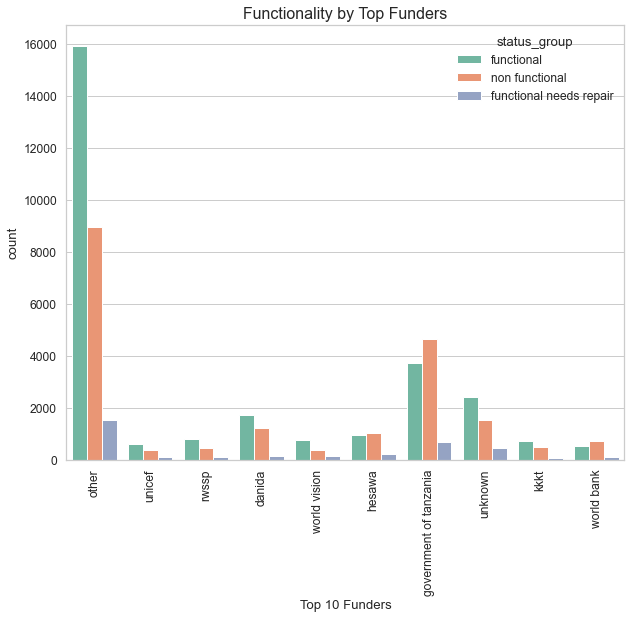

In [108]:
top_funders = train_df1["funder_bkt"].value_counts().nlargest(10).index

plt.figure(figsize=(10,8))
sns.countplot(data=train_df1[train_df1["funder_bkt"].isin(top_funders)], x="funder_bkt", hue="status_group")
plt.xticks(rotation=90)
plt.title("Functionality by Top Funders", fontsize=16)
plt.xlabel("Top 10 Funders")
plt.show()

**Observation**: “Other” dominates (many small/unknown funders). Larger organizations (Gov’t of Tanzania, World Bank, UNICEF) show mixed reliability.

**Interpretation**: Smaller/unknown funders may deliver inconsistent quality. Big donors should monitor contractors and sustainability more closely.

#### 4.2.3.2 Top 10 Installers by Functionality Status of Wells

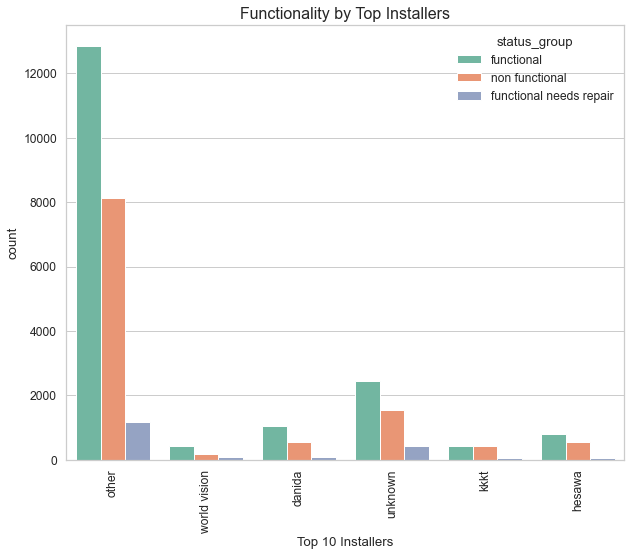

In [109]:
top_installers = train_df1["installer_bkt"].value_counts().nlargest(10).index

plt.figure(figsize=(10,8))
sns.countplot(data=train_df1[train_df1["installer_bkt"].isin(top_funders)], x="installer_bkt", hue="status_group")
plt.xticks(rotation=90)
plt.title("Functionality by Top Installers", fontsize=16)
plt.xlabel("Top 10 Installers")
plt.show()

**Observation**: “Other” dominates. Known installers (Hesawa, World Vision, Danida) show a mix of outcomes, but generally better than “other”.

**Interpretation**: Standardizing approved installers could reduce failure rates. Donors should vet contractors more carefully.

#### 4.2.3.3 Type of Payment by Functionality Status of Wells

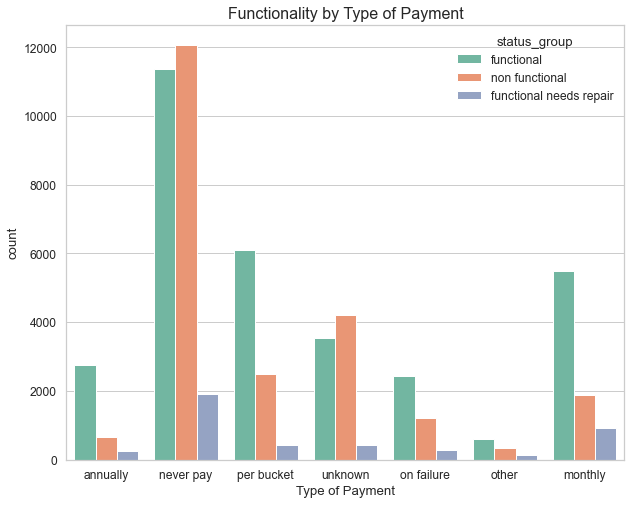

In [110]:
plt.figure(figsize=(10,8))
sns.countplot(data=train_df1, x="payment_type", hue="status_group")
plt.title("Functionality by Type of Payment", fontsize=16)
plt.xlabel("Type of Payment")
plt.show()

**Observation**: Wells where communities “never pay” show high non-functionality. Monthly and per-bucket payments are associated with higher functionality.

**Interpretation**: Sustainable financing mechanisms (user contributions) are strongly linked to reliable water systems. Donors and government should encourage structured payment models.

### 4.2.4 Correlation Heatmap 

Shows the numeric feature relationships with the target variable which is the functionality status of the wells.

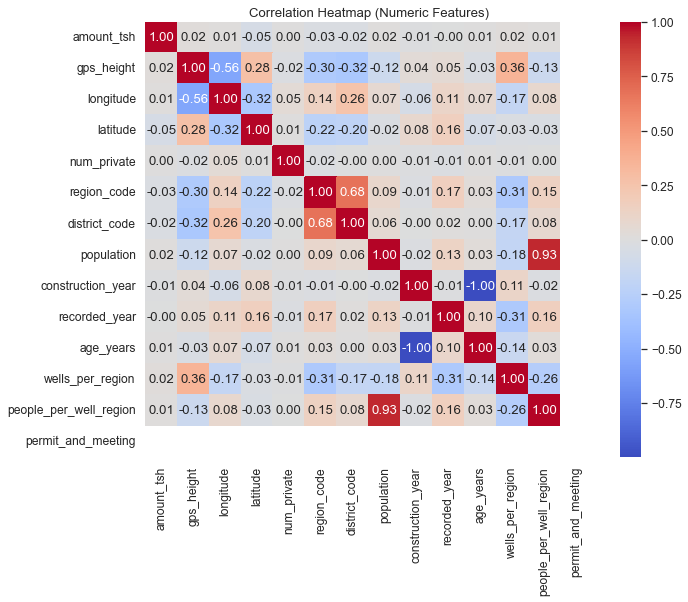

In [126]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df1.corr(), annot=True, fmt=".2f", cmap= "coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

**Observation**: There are weak correlations between the numeric features other than the derived features.

**Interpretation**: No single numeric variable alone drives outcomes suggesting that multi factor interactions are key.

## 4.3 Multivariate Analysis

### 4.3.1 Relationship between management group, type of payment and functionality status of the wells.

In [127]:
pd.crosstab([train_df1["management_group"], train_df1["payment_type"]], train_df1["status_group"], normalize="index") * 100


status_group                   functional  functional needs repair  \
management_group payment_type                                        
commercial       annually       61.538462                 0.000000   
                 monthly        50.386598                 2.963918   
                 never pay      43.527013                 3.363914   
                 on failure     61.538462                 7.692308   
                 other          70.000000                 0.000000   
                 per bucket     78.489117                 3.585147   
                 unknown        58.035714                 1.339286   
other            annually       66.666667                13.333333   
                 monthly        69.047619                 4.761905   
                 never pay      50.431779                 7.426598   
                 on failure     62.857143                 2.857143   
                 other          77.500000                 5.000000   
                 per bucket     60.975610                 1.829268   
                 unknown        64.705882                 4.411765   
parastatal       annually       76.190476                14.285714   
                 monthly        62.500000                19.318182   
                 never pay      56.828194                12.775330   
                 on failure     80.000000                 7.272727   
                 other          60.000000                16.000000   
                 per bucket     81.512605                 3.361345   
                 unknown        50.181159                11.413043   
unknown          annually       66.666667                 0.000000   
                 monthly        88.235294                 0.000000   
                 never pay      34.814815                 4.444444   
                 on failure     50.000000                 0.000000   
                 other           0.000000                 0.000000   
                 per bucket     60.000000                 3.333333   
                 unknown        37.430168                 5.586592   
user-group       annually       75.428250                 6.795844   
                 monthly        67.669784                11.996747   
                 never pay      44.392174                 7.513739   
                 on failure     61.833069                 7.131537   
                 other          56.903766                11.715481   
                 per bucket     65.386779                 4.852321   
                 unknown        42.314881                 4.931704   

status_group                   non functional  
management_group payment_type                  
commercial       annually           38.461538  
                 monthly            46.649485  
                 never pay          53.109072  
                 on failure         30.769231  
                 other              30.000000  
                 per bucket         17.925736  
                 unknown            40.625000  
other            annually           20.000000  
                 monthly            26.190476  
                 never pay          42.141623  
                 on failure         34.285714  
                 other              17.500000  
                 per bucket         37.195122  
                 unknown            30.882353  
parastatal       annually            9.523810  
                 monthly            18.181818  
                 never pay          30.396476  
                 on failure         12.727273  
                 other              24.000000  
                 per bucket         15.126050  
                 unknown            38.405797  
unknown          annually           33.333333  
                 monthly            11.764706  
                 never pay          60.740741  
                 on failure         50.000000  
                 other             100.000000  
                 per bucket         36.666667  
                 

#### Observations

*User-groups (the majority category)*:

- Show best functionality when communities contribute annually (~75% functional) or monthly (~68% functional).
- “Never pay” wells drop sharply (only ~44% functional, nearly half non-functional).
- “Unknown” payment type performs poorly (~42% functional).

*Parastatal management*:

- Perform strongly when payments are structured (annually ~76%, per bucket ~81%).
- “Never pay” again shows lower functionality (~57%).

*Commercial management*:

- Outcomes are mixed — “per bucket” has higher reliability (~78%), but “never pay” is weakest (~43% functional).

*Other/Unknown managers*:

- Results vary widely, with “never pay” and “unknown” categories generally performing worse.

#### Interpretation

- Payment structures strongly influence well sustainability, across all management models.

- User-groups and structured payments (annual/monthly) deliver the most sustainable outcomes.

- Wells where communities never pay or payment is “unknown” have much higher rates of non-functionality.

- Parastatal-managed wells perform relatively well under structured payment schemes, suggesting stronger oversight.

#### Business Takeaway

A well’s sustainability is not just about who manages it, but also how payment is structured.

For NGOs, donors, and government:

1. Strengthen user-group governance with structured payments.

2. Avoid “free water” models — they correlate with higher breakdown rates.

3. Encourage annual or per-bucket contributions, especially for parastatal and commercial management.

### 4.3.2 Relationship  between Age of Well, Type of Waterpoint and Functionality Status of Wells

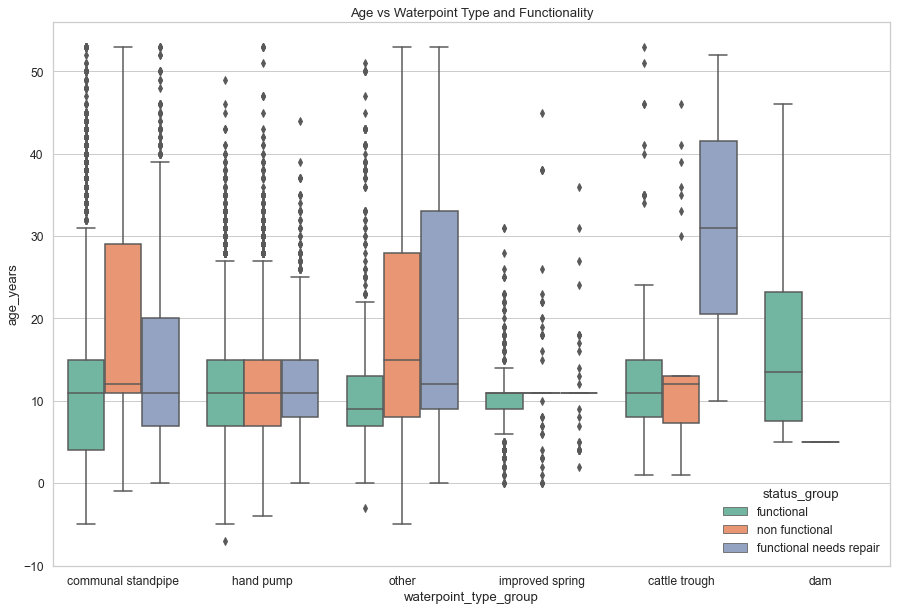

In [130]:
plt.figure(figsize=(15,10))
sns.boxplot(data=train_df1, x="waterpoint_type_group", y="age_years", hue="status_group")
plt.title("Age vs Waterpoint Type and Functionality")
plt.show()

**Observations**

*Communal standpipes*: Functional wells tend to be younger. Many non-functional ones are clustered at higher ages (15+ years).

*Hand pumps*: Distribution is younger compared to communal standpipes. Non-functional hand pumps appear more evenly spread across ages.

*Other types*: Wide spread in ages, with many non-functional wells even at younger ages.

*Improved springs & cattle troughs*: Generally younger; functionality is relatively stable.

*Dams*: Fewer data points, but many are older and still functional, though variability is high.

**Interpretation**

Age clearly influences functionality, but the effect varies by technology:

- Communal standpipes show clear aging-related failures → they degrade faster.
- Hand pumps are more resilient across ages but still have significant failures.
- Improved springs seem relatively reliable even as they age.
- Dams are rare but appear to last longer when maintained.

This interaction suggests that maintenance priorities should differ by waterpoint type:

*Standpipes*: higher priority for preventive repairs as they age.

*Hand pumps*: more evenly distributed → failure may be linked to management, not just age.

*Springs/dams*: appear more durable, but limited coverage.

**Business takeaway**: Technology choice and age jointly predict functionality. Maintenance schedules should not be uniform; instead, tailor based on both age and type of waterpoint.

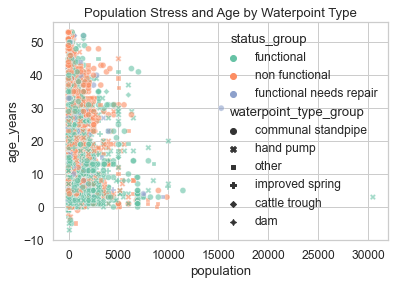

In [132]:
sns.scatterplot(data=train_df1, x="population", y="age_years", hue="status_group", style="waterpoint_type_group", alpha=0.6)
plt.title("Population Stress and Age by Waterpoint Type")
plt.show()


In [140]:
pd.crosstab([train_df1["region_zone"], train_df1["source_class"]], train_df1["status_group"], normalize="index")

status_group                     functional  functional needs repair  \
region_zone        source_class                                        
central            groundwater     0.460565                 0.072669   
                   surface         0.632812                 0.171875   
                   unknown         0.166667                 0.000000   
coastal            groundwater     0.425890                 0.040160   
                   surface         0.661522                 0.020224   
                   unknown         0.782609                 0.014493   
lake_basin         groundwater     0.525424                 0.077651   
                   surface         0.414672                 0.093436   
                   unknown         0.245283                 0.000000   
northern_highlands groundwater     0.638312                 0.059940   
                   surface         0.625510                 0.077551   
                   unknown         0.714286                 0.071429   
other              groundwater     0.517565                 0.067613   
                   surface         0.502859                 0.237133   
                   unknown         0.279070                 0.000000   
southern_highlands groundwater     0.618394                 0.043667   
                   surface         0.557711                 0.117662   
                   unknown         0.400000                 0.100000   

status_group                     non functional  
region_zone        source_class                  
central            groundwater         0.466766  
                   surface             0.195312  
                   unknown             0.833333  
coastal            groundwater         0.533950  
                   surface             0.318254  
                   unknown             0.202899  
lake_basin         groundwater         0.396926  
                   surface             0.491892  
                   unknown             0.754717  
northern_highlands groundwater         0.301748  
                   surface             0.296939  
                   unknown             0.214286  
other              groundwater         0.414822  
                   surface             0.260008  
                   unknown             0.720930  
southern_highlands groundwater         0.337938  
                   surface             0.324627  
                   unknown             0.500000

#### Observations

*Groundwater*:

- Performs best in the Northern Highlands (~64% functional) and Southern Highlands (~61%).
- Weakest in Coastal (~43%) and Central zone (~46%), where non-functional rates are higher.

*Surface water*:

- In the Central zone, surface water is relatively functional (~63%), better than groundwater.
- In the Coastal and Lake Basin, surface water performs worse (high non-functionality ~32–49%).

*Unknown source class*:

- Generally unreliable, with very high non-functionality (e.g., 83% in Central, 75% in Lake Basin).

#### Interpretation

- Groundwater reliability is highly regional: better in the Highlands, worse in Coastal/Central areas (possibly due to salinity, water table depth, or geology).
- Surface water reliability varies: more functional in Central, but less so in Coastal and Lake Basin where contamination/flooding are likely issues.
- Unknown source classification indicates poor records or unclear construction — strongly correlated with failures.

## 4.4 Hypothesis Testing

In this section, we statistically test whether key factors identified in EDA 
(financing, governance, technical, and environmental) are significantly associated 
with well functionality.

We use:
- **Chi-Square Test of Independence** for categorical variables vs functionality.
- **ANOVA (Analysis of Variance)** for numeric vs functionality groups.